Original Dataset: https://stats.oecd.org/Index.aspx?QueryId=95071

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

1. How does the GDP of a country correlate to both the arrival and departure rates (travel to and from the country, respectively)?
2. Which countries have the highest and lowest outbound international travel numbers**
3. Which countries saw the greatest and least change in incoming and outgoing international travelers between 2008 and 2018?

# Explore the df

## Things to Do

### Handle the different data between the demand and supply survey
- Supply has "Total international arrivals" and "nights in all types of accomodation"
- the numbers are different, for example in Kazakhstan and Peru:
```python
inbound_df[(inbound_df['Country']== 'Kazakhstan') & (inbound_df['Source']=='Tourism supply surveys')]
inbound_df[(inbound_df['Country']== 'Kazakhstan') & (inbound_df['Source']=='Tourism demand surveys')]
# Kazakhstan	Total international arrivals	Tourism supply surveys	2008	543022
# Kazakhstan	Total international arrivals	Tourism demand surveys	2008	411700
inbound_df[(inbound_df['Country']== 'Peru') & (inbound_df['Source']=='Tourism supply surveys')]
inbound_df[(inbound_df['Country']== 'Peru') & (inbound_df['Source']=='Tourism demand surveys')]
# Peru	Total international arrivals	Tourism demand surveys	2008	2581562
# Peru	Nights in all types of accommodation	Tourism supply surveys	2008	24691440 
```

- get total count of international tourists, in total, per year

- Group by counry, variable (country) and year 
    - find country with most change incoming from 08 - 18 (increase and decreased)
    - most incoming tourists per year by country 
    
    - merge the other dataset to group by total outgoing tourists (easier one)
    - find country with most tourists in total, 
        - over time
        - per year
    - find country with most change outgoing between 08 - 18 (increased and decreased)
    
    - merge the gdp dataset with both datasets 
        - Graph correlation table between GDP and 
        - Graph change of GDP against change of incoming/outgoing tourists

### Handle how there are some overlapping places (questionable_places):
- Filter out all the "questionable_places" from the "Variables" column
-  Combined all of Belgium toghether from the "Country" column: 'Belgium', 'Region of Brussels-Capital', 'Flanders', 'Wallonia'
    - Blegium's 'Overnight visitors (tourists)' total == the tourist numbers from 'Region of Brussels-Capital', 'Flanders', 'Wallonia'

- Handle how Japan, Philippines, Korea have two additional China places (Hong Kong and Taipei)
    
- Handle how Ireland has "Other Europe" and "United States/Canada" as their variables
 
- Handle how 'Kazakhstan' and 'Slovak Republic' have 'Tourism demand surveys' and 'Tourism supply surveys'

- Handle what to do with "Nordic Countries" --> Spain and Iceland
    - Nordic countries include Denmark, Norway, Sweden, and Finland.

- Handle "Switzerland and Leichtenshtein" --> Austria

- Handle "South America" --> Costa Rica

- Handle how Netherlands has "America (Continent) --> Netherlands

### What kind of change to look at
- net
- percent change
- keep a consistent story throughout 
- by gdp and population

## Simple Visualization to show dataset
- inbound vs. outbound tourism over time in total 

In [2]:
inbound = pd.read_csv('data/TOURISM_INBOUND_29032020041047359.csv')
inbound.head()

,COUNTRY,Country,VARIABLE,Variable,SOURCE,Source,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,INB_ARRIVALS_TOTAL,Total international arrivals,DEMAND,Tourism demand surveys,2008,2008,5621800,NaN,NaN
1,AUS,Australia,INB_ARRIVALS_TOTAL,Total international arrivals,DEMAND,Tourism demand surveys,2009,2009,5515000,NaN,NaN
2,AUS,Australia,INB_ARRIVALS_TOTAL,Total international arrivals,DEMAND,Tourism demand surveys,2010,2010,5671000,NaN,NaN
3,AUS,Australia,INB_ARRIVALS_TOTAL,Total international arrivals,DEMAND,Tourism demand surveys,2011,2011,5899800,NaN,NaN
4,AUS,Australia,INB_ARRIVALS_TOTAL,Total international arrivals,DEMAND,Tourism demand surveys,2012,2012,5990800,NaN,NaN


In [3]:
inbound_df = inbound[['Country', 'Variable', 'SOURCE', 'Year', 'Value']]
inbound_df.head()

,Country,Variable,SOURCE,Year,Value
0,Australia,Total international arrivals,DEMAND,2008,5621800
1,Australia,Total international arrivals,DEMAND,2009,5515000
2,Australia,Total international arrivals,DEMAND,2010,5671000
3,Australia,Total international arrivals,DEMAND,2011,5899800
4,Australia,Total international arrivals,DEMAND,2012,5990800


In [4]:
len(inbound_df.Variable.unique())

87

In [5]:
#Entries in the 'Variable' column

#Non-place indicators 
total_counts = ['Total international arrivals', 'Nights in all types of accommodation','Hotels and similar establishments','Other collective establishments', 'Private accommodation', 'Overnight visitors (tourists)', 'Same-day visitors (excursionists)']

#places, including some overlap 
places = ['China', 'United Kingdom', 'Japan',
       'New Zealand', 'United States', 'Singapore', 'Switzerland and Liechtenstein',
       'Germany', 'Italy', 'Netherlands', 'Spain', 'France', 'Australia', 'Poland',
       'Russian Federation', 'Slovak Republic', 'Norway', 'Sweden',
       'Estonia', 'Belgium', 'Switzerland', 'Bulgaria',
       'Former Yugoslav Republic of Macedonia', 'Romania', 'Turkey',
       'Austria', 'Czech Republic', 'Nordic countries', 'Great Britain',
       'United States/Canada', 'Hong Kong, China', 'Korea',
       'Chinese Taipei', 'Canada', 'Asia', 'America (Continent)',
       'Denmark', 'Belarus', 'Lithuania', 'Ukraine', 'Finland', 'Iran',
       'Georgia', 'Ireland', 'Brazil', 'Mexico', 'Chile', 'Europe',
       'Paraguay', 'Uruguay', 'Argentina', 'Greece', 'Bolivia', 'Peru',
       'Venezuela', 'Ecuador', 'Central America', 'South America',
       'Slovenia', 'Latvia', 'Bangladesh', 'Sri Lanka', 'Malaysia',
       'Colombia', 'Hungary', 'Croatia', 'Serbia', 'Lesotho',
       'Mozambique', 'Swaziland', 'Zimbabwe', 'Botswana',
       'Bosnia and Herzegovina', 'Montenegro', 'Other Europe', 'India',
       'Israel', 'Kazakhstan', 'Armenia', 'Azerbaijan']

#There may be overlap in these locations
questionable_places = ['Other Europe','United States/Canada', 'United States', 'Canada', 'America (Continent)', 'South America',
                       'Switzerland and Liechtenstein', 'Switzerland',  'Nordic countries', 'Chinese Taipei', 'Hong Kong, China', 'China']
                       
                       
                       

In [6]:
len(places)

80

In [7]:
len(inbound_df.Country.unique())

58

# Definitions

- **Total International arrivals** = Comes from the *Tourism Demand Survey*
    - Total International arrivals =  "Overnight visitors (tourists)" + "Same-day visitors (excursionists)"


- **Total international arrivals** from the *Tourism Supply Survey*
    - in one category - overnight 
    - Denmark, Iceland, Israel, Japan, New Zealand, Sweden, Peru all count tourists by "Nights in all types of
    accomodation" from the **Tourism Supply Survey**
    - All these above countries also have their data in the Tourism demand survey "Total international Arrivals"
    

## Inconsistent Country Names - from questionable_places

### Netherlands - America (Continent)

In [11]:
# inbound_df[inbound_df['Variable']=='America (Continent)']

### Costa Rica

In [12]:
# inbound_df[inbound_df['Variable']=='South America']

### Austria

In [13]:
# inbound_df[inbound_df['Variable']== 'Switzerland and Liechtenstein']

### Spain + Iceland have 'Nordic countries' as a variable

In [14]:
# Nordic countries include Denmark, Norway, Sweden, and Finland.

# inbound_df[inbound_df['Variable']== 'Nordic countries']

### Ireland

In [15]:
#Ireland has variables from United States/Canada and Other Europe

# inbound_df[(inbound_df['Country']=='Ireland') & inbound_df['Variable'].isin(questionable_places)].head(40)

### Combine all of Belgium together
Belgium, 'Region of Brussels-Capital', 'Flanders', 'Wallonia'



In [18]:
#Inconsistent Entries / Double counted

# Belgian = ['Belgium,' 'Flanders','Wallonia','Region of Brussels-Capital']

In [17]:
# inbound_df[inbound_df['Country'].isin(Belgian)].head(40)

In [19]:
# Variable == Belgian is not in the dataframe
# inbound_df[inbound_df['Variable'].isin(Belgian)].head(40)

In [20]:
# wallonia total overnight visitors 2008 =774859
# Flanders 2776867
# Region of Brussels-Capital = 2268127
# Belgium total overnight visitors = 5819853 = wallonia + flanders + brussels together

#See below to check

# inbound_df[(inbound_df['Country']== 'Belgium') & (inbound_df['Year']== 2008)]

### Handle the additional Chinese places in Japan, Korea, Philippines

In [21]:
# inbound_df[(inbound_df['Variable'] == 'Hong Kong, China')|
#            (inbound_df['Variable'] == 'Chinese Taipei')]

# Japan, Korea and Phillippines all have China AND...
# Japan, korea, Phillippines all use Chinese Taipei,
# Japan, Korea have 'Hong Kong, China'
# Check the years, they aren't all there

In [22]:
# inbound_df[(inbound_df['Variable'] == 'China') & (inbound_df['Country'] == 'Philippines')]

In [23]:
# inbound_df[inbound_df['Variable']=='United States/Canada']

In [24]:
# inbound_df[(inbound_df['Year'] == 2009) & (inbound_df['Variable']=='Total international arrivals')].sort_values('Country')

In [26]:
# Kasakhstan and Slovak Republic have data from both supply and demand surveys

# inbound_df[(inbound_df['Variable']=='Total international arrivals') & (inbound_df['Source']=='Tourism supply surveys')].sort_values('Country')

In [27]:
# inbound_df[(inbound_df['Variable']=='Total international arrivals') & ((inbound_df['Country']=='Slovak Republic') | (inbound_df['Country']== 'Kazakhstan'))].sort_values(['Country', 'Year'])



## Explore the Demand and Supply Surveys

Start Making Cleaning Pipeline:
1. get all the countries' inbound number by year by the supply and demand surveys 
2. Sort by country
3. if the country has >1 source, choose in this order
        a) 'Total international arrivals' from the 'Tourism demand survey'
        b) 'Overnight visitors (tourists)' from the	'Tourism demand survey'
        c) 'Overnight visitors (tourists)' from the	'Tourism Supply survey'

In [28]:
def get_inbound_by_year(year):
    per_year = inbound_df[(inbound_df['Variable']=='Overnight visitors (tourists)') | (inbound_df['Variable']=='Total international arrivals')] 
    return per_year[per_year['Year']==year].sort_values('Country')
    
get_inbound_by_year(2008).head().sort_values('Country')

,Country,Variable,SOURCE,Year,Value
3655,Argentina,Overnight visitors (tourists),SUPPLY,2008,4700000
3656,Argentina,Overnight visitors (tourists),DEMAND,2008,4700000
0,Australia,Total international arrivals,DEMAND,2008,5621800
121,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409
231,Belgium,Overnight visitors (tourists),SUPPLY,2008,5819853


Czech republic - use the supply survey. The demand survey is on collective nights.
In 2012, they all switched over

In [29]:
inbound_df[(inbound_df['Country']=='Czech Republic') & (inbound_df['Year']==2008)].head()

,Country,Variable,SOURCE,Year,Value
440,Czech Republic,Overnight visitors (tourists),SUPPLY,2008,6649410
458,Czech Republic,Germany,SUPPLY,2008,1475858
469,Czech Republic,United Kingdom,SUPPLY,2008,484279
480,Czech Republic,Italy,SUPPLY,2008,374632
491,Czech Republic,Poland,SUPPLY,2008,376592


## Narrowing It Down

In [98]:
schen_eu_countries = ['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Bulgaria', 'Croatia', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Romania', 'Slovenia']


In [296]:
schen_eu_df = inbound_df[inbound_df['Country'].isin(schen_eu_countries)]
# schen_eu[schen_eu['Year']==2008].head()
schen_eu_df

,Country,Variable,SOURCE,Year,Value
121,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409
122,Austria,Overnight visitors (tourists),SUPPLY,2009,21355440
123,Austria,Overnight visitors (tourists),SUPPLY,2010,22004266
124,Austria,Overnight visitors (tourists),SUPPLY,2011,23011956
125,Austria,Overnight visitors (tourists),SUPPLY,2012,24150776
...,...,...,...,...,...
6288,Romania,Israel,SUPPLY,2014,139425
6289,Romania,Israel,SUPPLY,2015,219307
6290,Romania,Israel,SUPPLY,2016,251908
6291,Romania,Israel,SUPPLY,2017,292752


In [297]:
# Check out what Iceland has for Overnight visitors (tourists)
schen_eu_df[(schen_eu_df['Country']=='Iceland') & (schen_eu_df['Variable']=='Overnight visitors (tourists)')].head(50)

,Country,Variable,SOURCE,Year,Value
1567,Iceland,Overnight visitors (tourists),DEMAND,2009,493940
1568,Iceland,Overnight visitors (tourists),DEMAND,2010,485016
1569,Iceland,Overnight visitors (tourists),DEMAND,2011,565611
1570,Iceland,Overnight visitors (tourists),DEMAND,2012,672773
1571,Iceland,Overnight visitors (tourists),DEMAND,2013,807349
1572,Iceland,Overnight visitors (tourists),DEMAND,2014,997556
1573,Iceland,Overnight visitors (tourists),DEMAND,2015,1289139
1574,Iceland,Overnight visitors (tourists),DEMAND,2016,1792060
1575,Iceland,Overnight visitors (tourists),DEMAND,2017,2224603
1576,Iceland,Overnight visitors (tourists),DEMAND,2018,2343773


In [298]:
# All 29 countries from the schen_eu dataframe 
countries = schen_eu_df['Country'].unique()
print (countries, '\n', len(countries))

['Austria' 'Belgium' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Luxembourg'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain'
 'Sweden' 'Switzerland' 'Bulgaria' 'Croatia' 'Estonia' 'Latvia'
 'Lithuania' 'Malta' 'Romania' 'Slovenia'] 
 29


In [299]:
# All the countries that have the "Overnight visitors (tourists)" as a Variable (leaving out Bulgaria)

schen_eu_df[schen_eu_df['Variable']=='Overnight visitors (tourists)']['Country'].unique()
# len(schen_eu[schen_eu['Variable']=='Overnight visitors (tourists)']['Country'].unique()) # = 28 countries

array(['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Croatia', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Romania',
       'Slovenia'], dtype=object)

In [284]:
#the unique countries that come from supply and demand 
set(all_years_supply['Country'])
set(all_years_demand['Country'])

{'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Spain',
 'Sweden'}

In [301]:
# The countries that are only in demand
countries_only_in_demand = set(all_years_demand['Country']).difference(set(all_years_supply['Country']))
countries_only_in_demand


{'Denmark', 'France', 'Iceland', 'Ireland', 'Malta', 'Sweden'}

In [302]:
# The countries only in supply
countries_only_in_supply = set(all_years_supply['Country']).difference(set(all_years_demand['Country']))
countries_only_in_supply

{'Austria',
 'Belgium',
 'Croatia',
 'Germany',
 'Greece',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Romania',
 'Slovenia',
 'Switzerland'}

In [303]:
# Countries to get from Supply
countries_in_supply = set(schen_eu_df['Country']).difference(countries_only_in_demand)
countries_in_supply

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Estonia',
 'Finland',
 'Germany',
 'Greece',
 'Hungary',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Switzerland'}

In [316]:
def get_tourists_from_source(source, year, country_list, variable = 'Overnight visitors (tourists)' , df = schen_eu,):
    '''
    Returns a dataframe that only includes the information from the
    SOURCE = 'DEMAND' column from the input dataframe

    Parameters:
        
        source (str): the source from which to collect the data.
            choices are "SUPPLY" or "DEMAND"

        year (int): the year to collect the information from
        
        country_list (lst, set): the list or set from which to get the country names

        variable (str): the description of the tourism data (aka, 'From where) to collect. 
            Default to 'Overnight visitors (tourists)' to represent all  
            overnight travelers, defined here as 'tourists'

        df (pandas DataFrame): the dataframe from which we are getting the values.
            Default to schen_eu

    Returns:
        a pandas Dataframe that includes the information from the DEMAND column 

    '''
    return schen_eu[(schen_eu['SOURCE']==source) & (schen_eu['Year']== year) & (schen_eu['Variable']== variable)].sort_values('Country') 



all_years = list(range(2008, 2019))   

all_years_supply_df = schen_eu_df[(schen_eu_df['SOURCE']=='SUPPLY') 
                                  & (schen_eu_df['Year'].isin(all_years)) 
                                  & (schen_eu_df['Variable']=='Overnight visitors (tourists)') 
                                    & (schen_eu_df['Country'].isin(countries_in_supply))]


only_years_demand_df = schen_eu[(schen_eu['SOURCE']=='DEMAND') 
                                & (schen_eu['Year'].isin(all_years)) 
                                & (schen_eu['Variable']=='Overnight visitors (tourists)') 
                                & (schen_eu_df['Country'].isin(countries_only_in_demand))]



In [317]:
all_years_supply_df
all_years_supply_df.head()

,Country,Variable,SOURCE,Year,Value
121,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409
122,Austria,Overnight visitors (tourists),SUPPLY,2009,21355440
123,Austria,Overnight visitors (tourists),SUPPLY,2010,22004266
124,Austria,Overnight visitors (tourists),SUPPLY,2011,23011956
125,Austria,Overnight visitors (tourists),SUPPLY,2012,24150776


In [313]:
only_years_demand_df
only_years_demand_df.head()

,Country,Variable,SOURCE,Year,Value
684,Denmark,Overnight visitors (tourists),DEMAND,2008,8514309
685,Denmark,Overnight visitors (tourists),DEMAND,2009,8179643
686,Denmark,Overnight visitors (tourists),DEMAND,2010,8247139
687,Denmark,Overnight visitors (tourists),DEMAND,2011,8504322
688,Denmark,Overnight visitors (tourists),DEMAND,2012,8525657


In [318]:
pd.merge(all_years_supply_df, only_years_demand_df, on=['Year', 'Variable', 'Country'], 
         suffixes = ['.supply', '.demand'], how = 'outer').sort_values(['Country', 'Year']).head()

,Country,Variable,SOURCE.supply,Year,Value.supply,SOURCE.demand,Value.demand
0,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409.00,NaN,nan
1,Austria,Overnight visitors (tourists),SUPPLY,2009,21355440.00,NaN,nan
2,Austria,Overnight visitors (tourists),SUPPLY,2010,22004266.00,NaN,nan
3,Austria,Overnight visitors (tourists),SUPPLY,2011,23011956.00,NaN,nan
4,Austria,Overnight visitors (tourists),SUPPLY,2012,24150776.00,NaN,nan


In [39]:
#get 'Overnight visitors (tourists)' from both the supply and demand sources in 2008
# tot_tourists_from_supply_08 = get_tourists_from_source('SUPPLY', 2008, variable = 'Overnight visitors (tourists)' , df = schen_eu)

# tot_tourists_from_demand_08 = get_tourists_from_source('DEMAND', 2008, variable = 'Overnight visitors (tourists)' , df = schen_eu)

In [40]:
# tot_tourists_from_supply_08

In [41]:
# tot_tourists_from_demand_08

## Merge of all countries on supply and demand

In [322]:
#make dataframe of the merged dfs
schen_eu_all_inbound_tourists_df = pd.merge(all_years_supply, all_years_demand, on=['Year', 'Variable', 'Country'], 
         suffixes = ['.supply', '.demand'], how = 'outer').sort_values('SOURCE.demand')
schen_eu_all_inbound_tourists_df

,Country,Variable,SOURCE.supply,Year,Value.supply,SOURCE.demand,Value.demand
22,Czech Republic,Overnight visitors (tourists),SUPPLY,2008,6649410.00,DEMAND,10118694.00
225,France,Overnight visitors (tourists),NaN,2010,nan,DEMAND,76647002.00
226,France,Overnight visitors (tourists),NaN,2011,nan,DEMAND,80498669.00
227,France,Overnight visitors (tourists),NaN,2012,nan,DEMAND,81979697.00
228,France,Overnight visitors (tourists),NaN,2013,nan,DEMAND,83633672.00
...,...,...,...,...,...,...,...
198,Slovenia,Overnight visitors (tourists),SUPPLY,2016,3396873.00,NaN,nan
199,Slovenia,Overnight visitors (tourists),SUPPLY,2017,3990682.00,NaN,nan
200,Slovenia,Overnight visitors (tourists),SUPPLY,2018,4425139.00,NaN,nan
210,Slovak Republic,Overnight visitors (tourists),SUPPLY,2017,2162384.00,NaN,nan


In [320]:
 pd.merge(all_years_supply, all_years_demand, on=['Year', 'Variable', 'Country'], 
         suffixes = ['.supply', '.demand'], how = 'outer').sort_values('SOURCE.demand')['Country'].unique()

array(['Czech Republic', 'France', 'Hungary', 'Iceland', 'Denmark',
       'Slovak Republic', 'Estonia', 'Lithuania', 'Malta', 'Sweden',
       'Ireland', 'Spain', 'Italy', 'Poland', 'Finland', 'Latvia',
       'Portugal', 'Austria', 'Belgium', 'Germany', 'Greece',
       'Luxembourg', 'Netherlands', 'Norway', 'Switzerland', 'Croatia',
       'Romania', 'Slovenia'], dtype=object)

In [48]:
alll = set(['Austria', 'Belgium', 'Czech Republic', 
                    'Denmark', 'Finland', 'France', 'Germany', 
                    'Greece', 'Hungary', 'Iceland', 'Ireland', 
                    'Italy', 'Luxembourg', 'Netherlands', 'Norway', 
                    'Poland', 'Portugal', 'Slovak Republic', 'Spain', 
                    'Sweden', 'Switzerland', 'Bulgaria', 'Croatia', 
                    'Estonia', 'Latvia', 'Lithuania', 'Malta', 
                    'Romania', 'Slovenia'])

tourists =  set(['Czech Republic', 'Finland', 'Italy', 'Latvia', 'Poland',
       'Slovak Republic', 'Denmark', 'Estonia', 'France', 'Hungary',
       'Ireland', 'Lithuania', 'Malta', 'Spain', 'Austria', 'Belgium',
       'Croatia', 'Germany', 'Luxembourg', 'Netherlands', 'Romania',
       'Slovenia', 'Switzerland'])


In [49]:
schen_eu_countries = ['Austria', 'Belgium', 'Czech Republic', 
                    'Denmark', 'Finland', 'France', 'Germany', 
                    'Greece', 'Hungary', 'Iceland', 'Ireland', 
                    'Italy', 'Luxembourg', 'Netherlands', 'Norway', 
                    'Poland', 'Portugal', 'Slovak Republic', 'Spain', 
                    'Sweden', 'Switzerland', 'Bulgaria', 'Croatia', 
                    'Estonia', 'Latvia', 'Lithuania', 'Malta', 
                    'Romania', 'Slovenia']

overnights = ['Austria' 'Belgium' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Luxembourg'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain'
 'Sweden' 'Switzerland' 'Croatia' 'Estonia' 'Latvia' 'Lithuania' 'Malta'
 'Romania' 'Slovenia']

In [323]:
def get_country_over_time(source, country, variable = 'Overnight visitors (tourists)' , df = schen_eu):

    '''
    Returns a dataframe that only includes the information from the
    SOURCE = 'DEMAND' column from the input dataframe. 
    Allows for a clean search, by country and source (survey)

    Parameters:
        
        source (str): the source from which to collect the data.
            choices are "SUPPLY" or "DEMAND"

        country (str): which country to look at over time

        variable (str): the description of the tourism data (aka, 'From where) to collect. 
            Default to 'Overnight visitors (tourists)' to represent all  
            overnight travelers, defined here as 'tourists'

        df (pandas DataFrame): the dataframe from which we are getting the values.
            Default to schen_eu

    Returns:
        a pandas Dataframe that includes the information from the SOURCE column 

    '''
    return schen_eu_df[(schen_eu_df['SOURCE']==source) & (schen_eu['Country']== country) & (schen_eu['Variable']== variable)].sort_values('Year') 


In [51]:
get_country_over_time('SUPPLY', 'Germany')

,Country,Variable,SOURCE,Year,Value
1110,Germany,Overnight visitors (tourists),SUPPLY,2008,24857752
1111,Germany,Overnight visitors (tourists),SUPPLY,2009,24125057
1112,Germany,Overnight visitors (tourists),SUPPLY,2010,26764892
1113,Germany,Overnight visitors (tourists),SUPPLY,2011,28264456
1114,Germany,Overnight visitors (tourists),SUPPLY,2012,30299258
1115,Germany,Overnight visitors (tourists),SUPPLY,2013,31407471
1116,Germany,Overnight visitors (tourists),SUPPLY,2014,32859540
1117,Germany,Overnight visitors (tourists),SUPPLY,2015,34831012
1118,Germany,Overnight visitors (tourists),SUPPLY,2016,35404924
1119,Germany,Overnight visitors (tourists),SUPPLY,2017,37307331


In [497]:
#inbound data TO Countries ONLY in the demands list
#Indices are countries 
schen_eu_only_demand_inbounds = only_years_demand.groupby(['Country', 'Year']).sum()
schen_eu_only_demand_inbounds

# index = schen_eu_only_demand_inbounds['Country'].unique()
# index

Value
Country Year          
Denmark 2008   8514309
        2009   8179643
        2010   8247139
        2011   8504322
        2012   8525657
        2013   8454546
        2014  10266729
        2015  10423502
        2016  10781249
        2017  12425764
        2018  12748837
France  2008  79218000
        2009  76764000
        2010  76647002
        2011  80498669
        2012  81979697
        2013  83633672
        2014  83701017
        2015  84451621
        2016  82682174
        2017  86758178
        2018  89321896
Iceland 2009    493940
        2010    485016
        2011    565611
        2012    672773
        2013    807349
        2014    997556
        2015   1289139
        2016   1792060
        2017   2224603
        2018   2343773
Ireland 2008   7288000
        2009   6470000
        2010   5695000
        2011   6021000
        2012   6035000
        2013   6393000
        2014   6824000
        2015   7747000
        2016   8425000
        2017   8722000
        2018   9273000
Malta   2008   1290856
        2009   1182490
        2010   1338841
        2011   1415018
        2012   1443414
        2013   1582153
        2014   1689809
        2015   1783366
        2016   1965928
        2017   2273837
        2018   2598690
Sweden  2011  11566770
        2012  12372124
        2013  11138752
        2014  10750215

In [481]:
#number of inbound tourists TO a country in the supply list
schen_eu_supply_inbounds = all_years_supply.groupby(['Country', 'Year']).sum()
#This is where the index is by country
schen_eu_supply_inbounds



Value
Country     Year          
Austria     2008  21935409
            2009  21355440
            2010  22004266
            2011  23011956
            2012  24150776
...                    ...
Switzerland 2014   9158260
            2015   9304633
            2016  10401929
            2017  11133204
            2018  11714581

[212 rows x 1 columns]

In [482]:
# inbound data for demand AND supply survey data. May not be so useful

# schen_eu_ds_inbounds = all_years_demand.groupby(['Country', 'Year']).sum()
# schen_eu_ds_inbounds

In [ ]:
# Find max and min differences


## Make some EDA

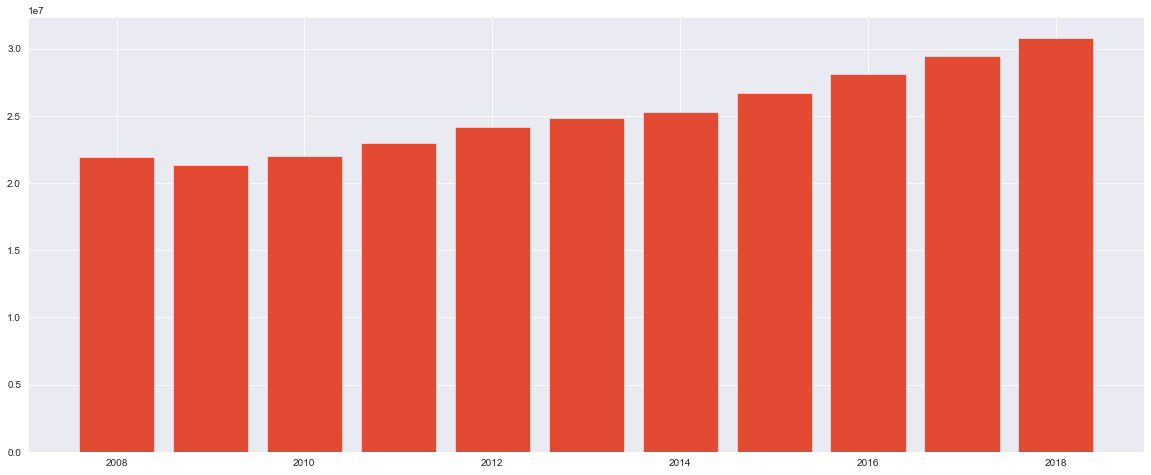

In [483]:
# bar graph
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

austria = schen_eu_supply_inbounds.loc['Austria'].reset_index()
ax.bar(austria['Year'], austria['Value']);


In [53]:
#print the datasets

# for country in overnight_visitors_countries:
#     if country in supply_countries:
#         for country in supply_countries:
#             print(get_country_over_time('SUPPLY', country, variable = 'Overnight visitors (tourists)' , df = schen_eu))
            
#     elif country in demand_countries:
#         for country in demand_countries:
#             print (get_country_over_time('DEMAND', country, variable = 'Overnight visitors (tourists)' , df = schen_eu))

# Read in the outbound dataset and organize

In [54]:
outbound = pd.read_csv('data/TOURISM_OUTBOUND_29032020041014703.csv')
outbound_df = outbound[['Country', 'Variable', 'Year', 'Value']]
outbound_df = outbound_df.rename(columns = {"Value": "Outgoing_Tourists"})
outbound_df

,Country,Variable,Year,Outgoing_Tourists
0,Australia,Total international departures,2008,5716200.0
1,Australia,Total international departures,2009,5858200.0
2,Australia,Total international departures,2010,6680900.0
3,Australia,Total international departures,2011,7424500.0
4,Australia,Total international departures,2012,8015600.0
...,...,...,...,...
2932,Turkey,Europe not specified,2014,648742.0
2933,Turkey,Europe not specified,2015,767269.0
2934,Turkey,Europe not specified,2016,921701.0
2935,Turkey,Europe not specified,2017,1104725.0


In [484]:
pd.options.display.float_format = '{:.2f}'.format
schen_eu_all_outbound_tourists_df = outbound_df[(outbound_df['Country'].isin(countries)) & (outbound_df['Variable']=='Overnight visitors (tourists)')]

schen_eu_all_outbound_tourists_df.head()

,Country,Variable,Year,Outgoing_Tourists
41,Austria,Overnight visitors (tourists),2008,9677370.88
42,Austria,Overnight visitors (tourists),2009,10121032.56
43,Austria,Overnight visitors (tourists),2010,9882473.05
44,Austria,Overnight visitors (tourists),2011,9873697.20
45,Austria,Overnight visitors (tourists),2012,10960345.00


In [334]:
# Which countries do not have data in 2008, etc

in_yr = set(schen_eu_all_outbound_tourists_df[schen_eu_all_outbound_tourists_df['Year']==2018]['Country'])

in_all = set(schen_eu_all_outbound_tourists_df['Country'])

# in_all.difference(in_yr)

# not in 08 not in {'Germany', 'Iceland', 'Ireland', 'Portugal'}

# no in 09 {'Germany', 'Ireland'}

# not in 10, 11 - {'Germany'}

#not in 13, 14, 15 - {'Sweden'}

# not in 17, 18 {'Bulgaria', 'Slovak Republic'}

In [485]:
inbound_and_outbound_tourists_df = pd.merge(schen_eu_all_inbound_tourists_df, schen_eu_all_outbound_tourists_df, on=['Year', 'Variable', 'Country'], 
         suffixes = ['.inbound', '.outbound'], how = 'outer').sort_values(['Country', 'Year'])

inbound_and_outbound_tourists_df

,Country,Variable,SOURCE.supply,Year,Value.supply,SOURCE.demand,Value.demand,Outgoing_Tourists
167,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409.00,NaN,nan,9677370.88
168,Austria,Overnight visitors (tourists),SUPPLY,2009,21355440.00,NaN,nan,10121032.56
169,Austria,Overnight visitors (tourists),SUPPLY,2010,22004266.00,NaN,nan,9882473.05
170,Austria,Overnight visitors (tourists),SUPPLY,2011,23011956.00,NaN,nan,9873697.20
171,Austria,Overnight visitors (tourists),SUPPLY,2012,24150776.00,NaN,nan,10960345.00
...,...,...,...,...,...,...,...,...
246,Switzerland,Overnight visitors (tourists),SUPPLY,2014,9158260.00,NaN,nan,13426518.05
247,Switzerland,Overnight visitors (tourists),SUPPLY,2015,9304633.00,NaN,nan,14925247.53
248,Switzerland,Overnight visitors (tourists),SUPPLY,2016,10401929.00,NaN,nan,14941381.31
249,Switzerland,Overnight visitors (tourists),SUPPLY,2017,11133204.00,NaN,nan,16650376.66


## EDA with the Outbound tourists

In [337]:
inbound_and_outbound_tourists_df['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland'], dtype=object)

In [338]:
inbound_and_outbound_tourists_df.columns

Index(['Country', 'Variable', 'SOURCE.supply', 'Year', 'Value.supply',
       'SOURCE.demand', 'Value.demand', 'Outgoing_Tourists'],
      dtype='object')

In [341]:
#REname the columns
inbound_and_outbound_tourists_df = inbound_and_outbound_tourists_df.rename(columns={"Variable": "Tourist_Type",
                                              "Value.supply": "Tourists_from_Supply_Survey", 
                                              "Value.demand": "Tourists_from_Demand_Survey"})
inbound_and_outbound_tourists_df

,Country,Tourist_Type,SOURCE.supply,Year,Tourists_from_Supply_Survey,SOURCE.demand,Tourists_from_Demand_Survey,Outgoing_Tourists
167,Austria,Overnight visitors (tourists),SUPPLY,2008,21935409.00,NaN,nan,9677370.88
168,Austria,Overnight visitors (tourists),SUPPLY,2009,21355440.00,NaN,nan,10121032.56
169,Austria,Overnight visitors (tourists),SUPPLY,2010,22004266.00,NaN,nan,9882473.05
170,Austria,Overnight visitors (tourists),SUPPLY,2011,23011956.00,NaN,nan,9873697.20
171,Austria,Overnight visitors (tourists),SUPPLY,2012,24150776.00,NaN,nan,10960345.00
...,...,...,...,...,...,...,...,...
246,Switzerland,Overnight visitors (tourists),SUPPLY,2014,9158260.00,NaN,nan,13426518.05
247,Switzerland,Overnight visitors (tourists),SUPPLY,2015,9304633.00,NaN,nan,14925247.53
248,Switzerland,Overnight visitors (tourists),SUPPLY,2016,10401929.00,NaN,nan,14941381.31
249,Switzerland,Overnight visitors (tourists),SUPPLY,2017,11133204.00,NaN,nan,16650376.66


In [345]:
max_outbounds_top_5_df = inbound_and_outbound_tourists_df.groupby('Country').max('Outgoing_Tourists').sort_values('Outgoing_Tourists', ascending = False).reset_index().head()
max_outbounds_top_5_df

,Country,Year,Tourists_from_Supply_Survey,Tourists_from_Demand_Survey,Outgoing_Tourists
0,Germany,2018,38747698.00,nan,108541530.83
1,Italy,2018,63195203.00,61567160.00,33347082.17
2,France,2018,nan,89321896.00,29055410.56
3,Netherlands,2018,18780000.00,nan,22166000.00
4,Sweden,2018,nan,12372124.00,20361000.00


# Graph outbound tourists

# Make some dfs with just outgoing tourists

In [486]:
#Percent change
germany_out = schen_eu_all_outbounds.loc['Germany']
germany_pct_change = germany_out.pct_change().reset_index()

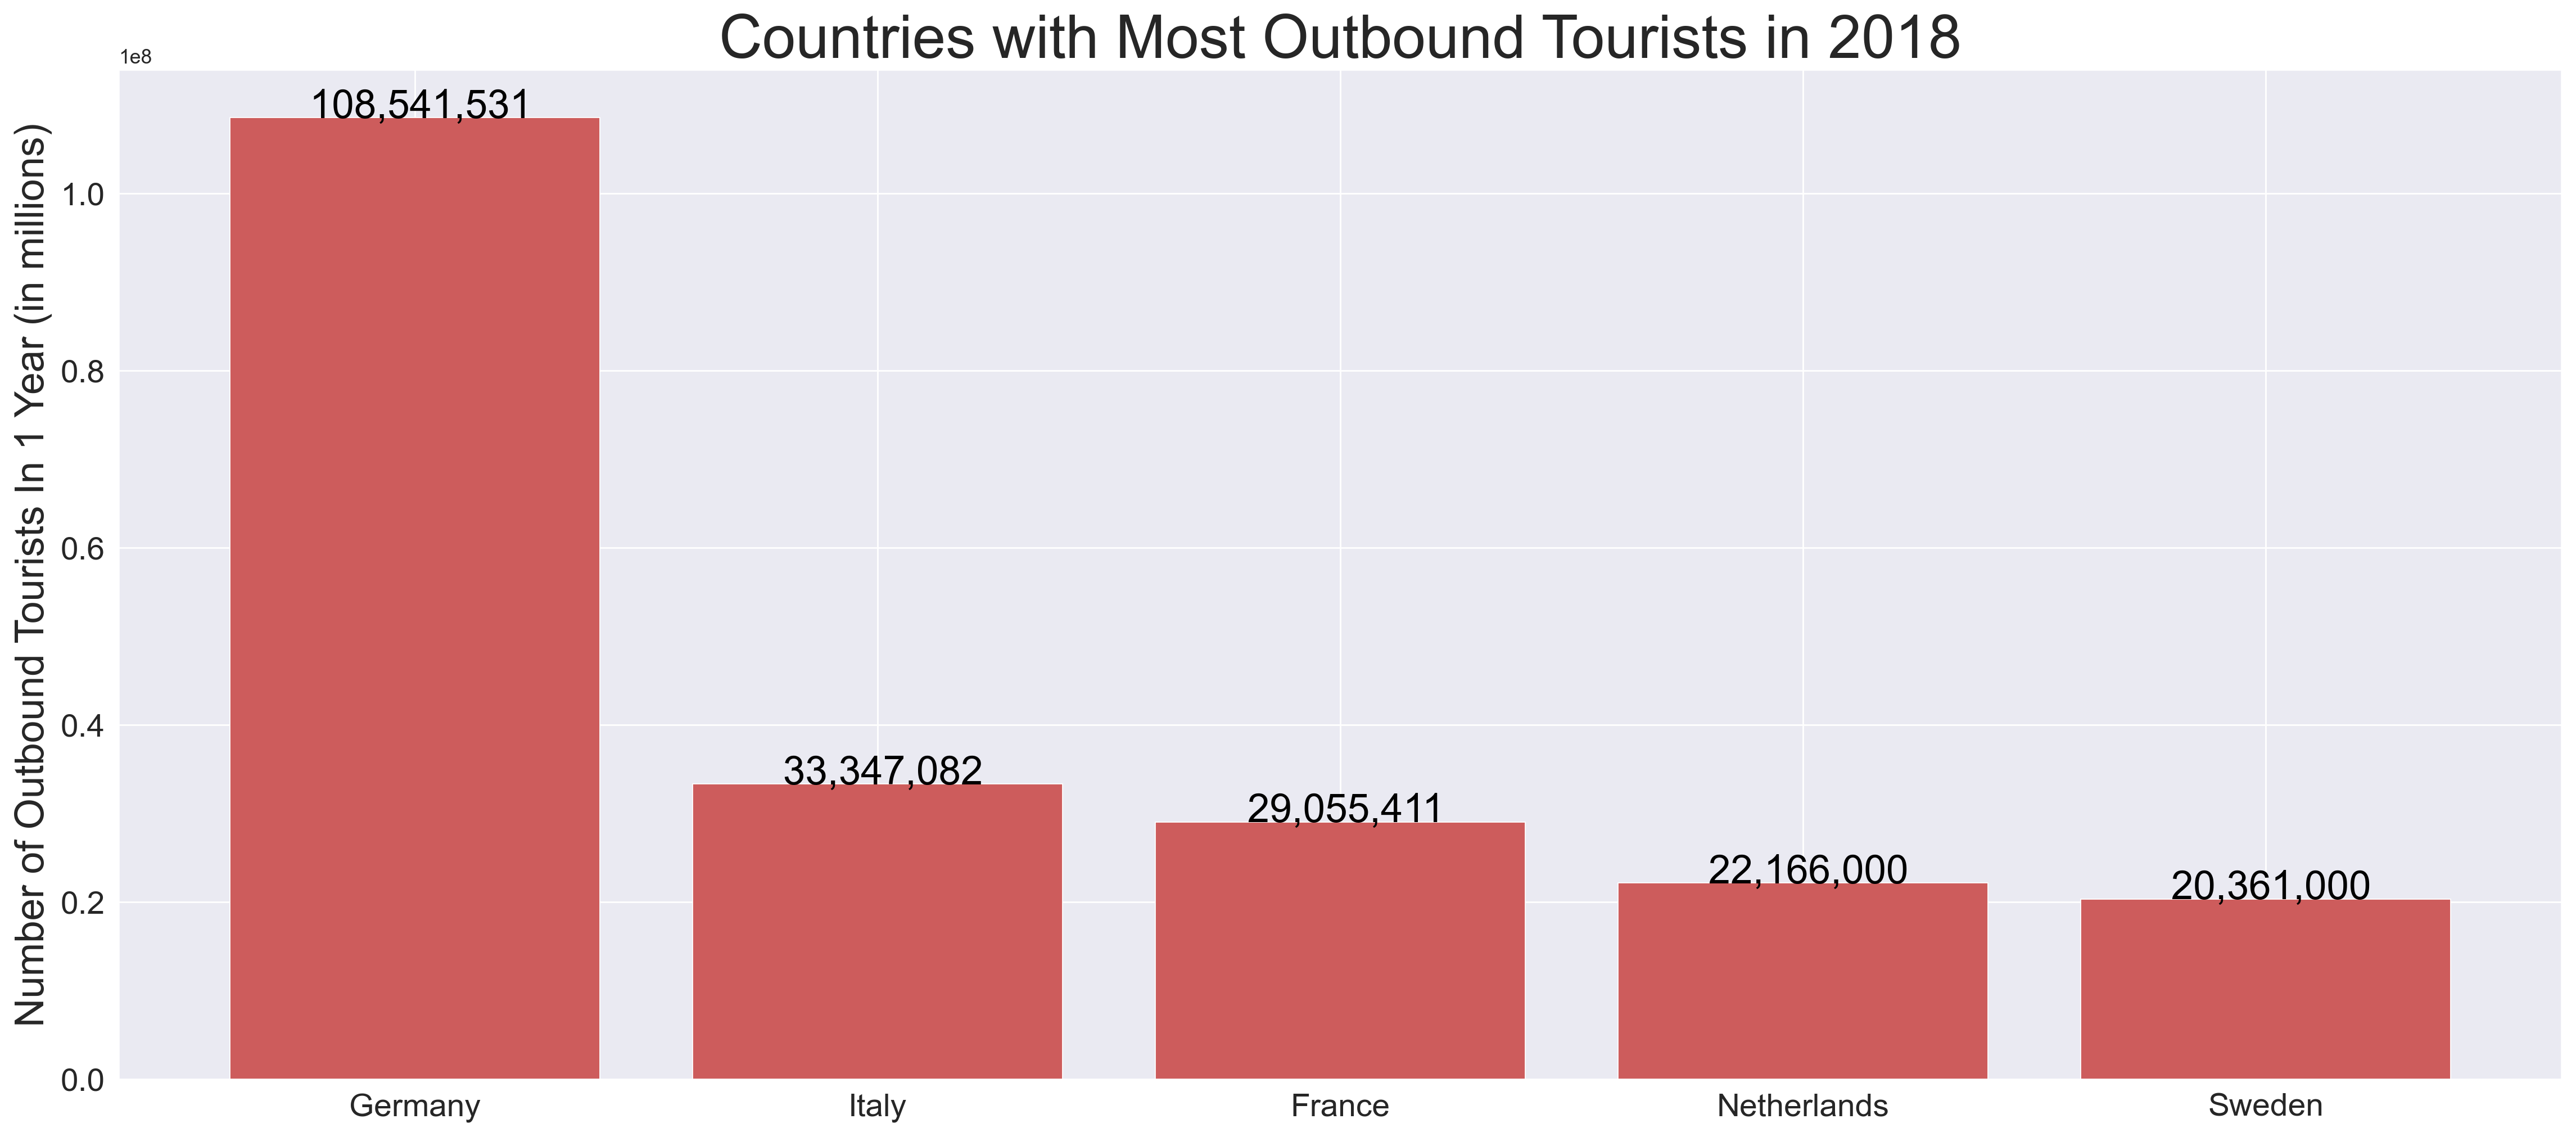

In [487]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize = (18, 8), dpi = 256)

ax.bar(max_outbounds_top_5['Country'], max_outbounds_top_5['Outgoing_Tourists'], color = 'indianred')

ax.tick_params(axis='both', which='major', labelsize=16)
# ax.set_xlabel('Countries', fontsize = 20)
ax.set_ylabel('Number of Outbound Tourists In 1 Year (in millions)',  fontsize = 20)
ax.set_title('Countries with Most Outbound Tourists in 2018', size = 30)

for idx, data in enumerate(max_outbounds_top_5['Outgoing_Tourists']):
    plt.text(x=idx, y = data , s = f"{data: ,.0f}", ha = 'center', fontsize = 20, color = 'black')
plt.tight_layout()

#add the year this occured = 2018

In [438]:
# look at countries with most --total-- tourists from 2012 - 2018 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

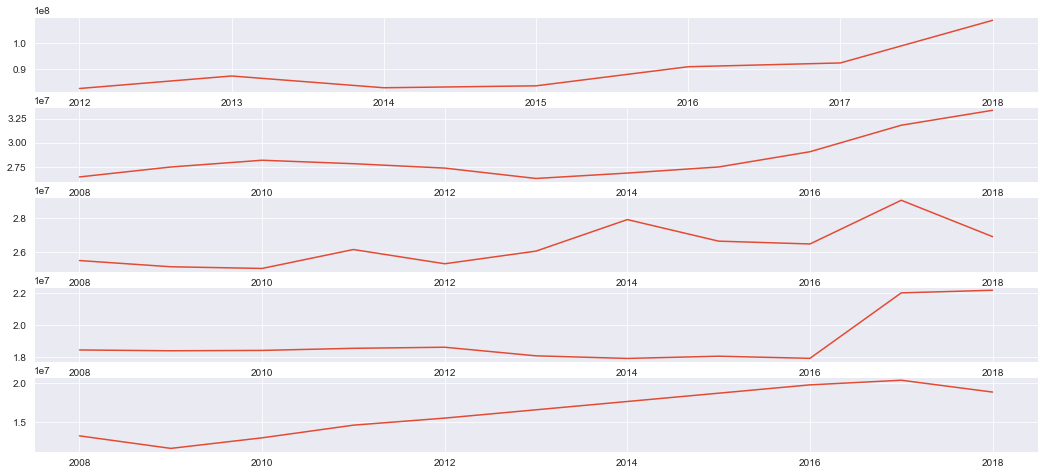

In [439]:
#Look at these top 5 countries over time

schen_eu_all_outbounds = schen_eu_all_outbound_tourists.groupby(['Country', 'Year']).sum()
# schen_eu_all_outbounds.reset_index(level = 'Country', col_level = 1).T
germany_out = schen_eu_all_outbounds.loc['Germany']
italy_out = schen_eu_all_outbounds.loc['Italy']
france_out = schen_eu_all_outbounds.loc['France']
netherlands_out = schen_eu_all_outbounds.loc['Netherlands']
sweden_out = schen_eu_all_outbounds.loc['Sweden']


fig, ax = plt.subplots(5, 1, figsize=(18, 8))

ax[0].plot(germany_out)
ax[1].plot(italy_out)
ax[2].plot(france_out)
ax[3].plot(netherlands_out)
ax[4].plot(sweden_out)
plt.tight_layout


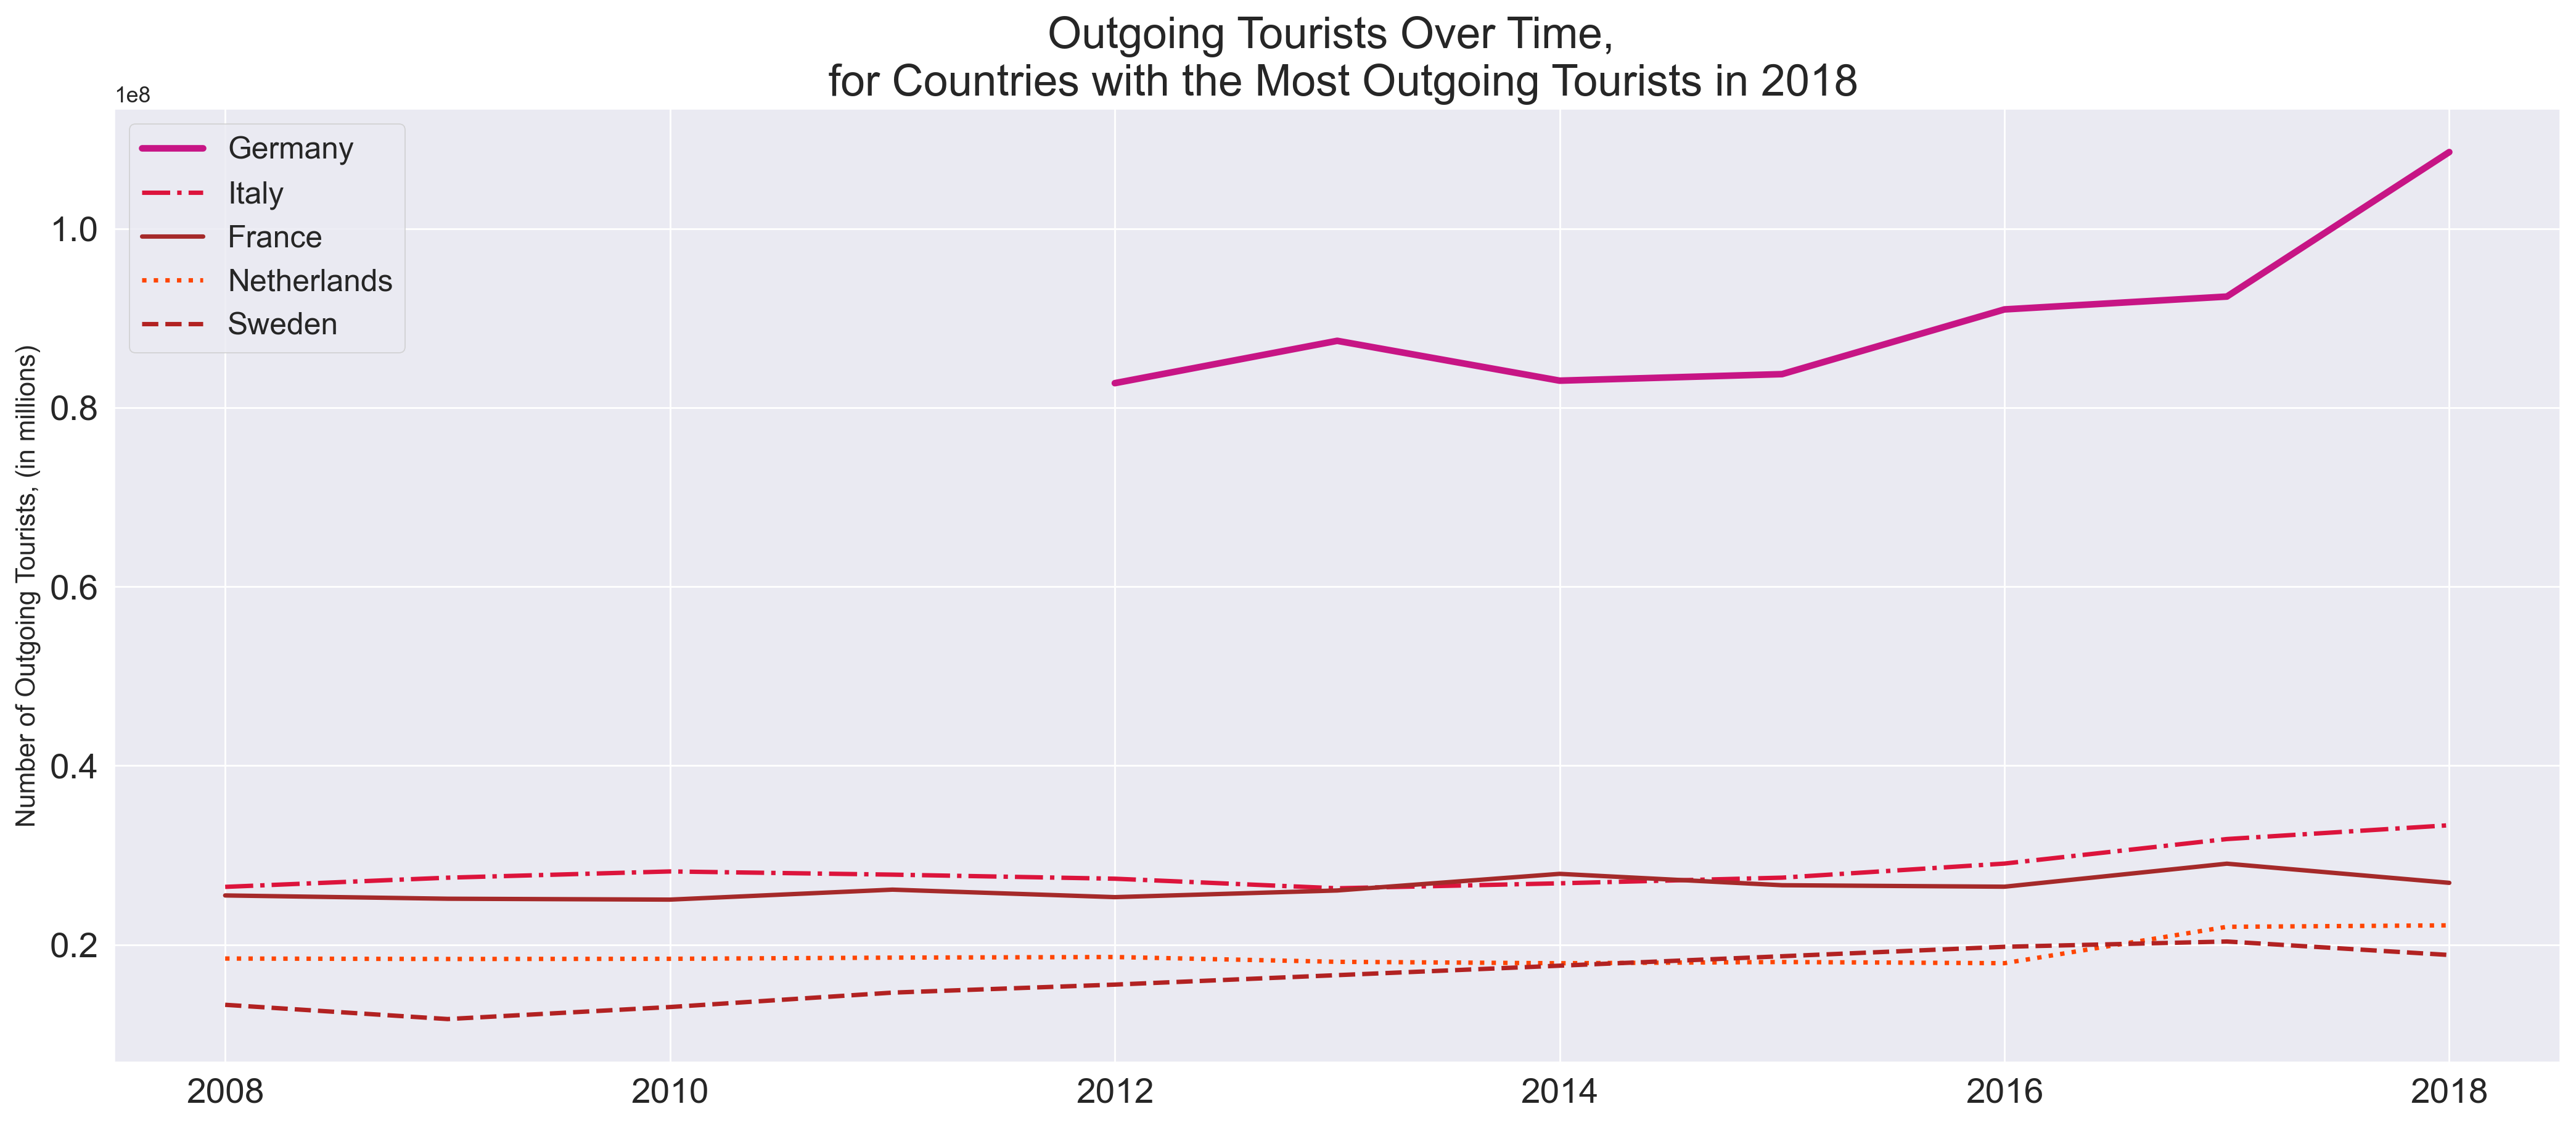

In [440]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8), dpi = 256)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Number of Outgoing Tourists, (in millions)', fontsize = 12 )


ax.plot(germany_out, color = 'mediumvioletred', lw = 3, label = 'Germany')
ax.plot(italy_out, color = 'crimson', ls = 'dashdot',lw = 2, label = 'Italy')
ax.plot(france_out, color = 'brown', ls = 'solid', lw = 2, label = 'France')
ax.plot(netherlands_out, color = 'orangered', ls = ":", lw = 2, label = 'Netherlands')
ax.plot(sweden_out, color = "firebrick", ls = 'dashed', lw = 2, label = 'Sweden')



ax.set_title('Outgoing Tourists Over Time, \n for Countries with the Most Outgoing Tourists in 2018', fontsize = 20)
plt.legend(fontsize = 14);

## Need to fit trendlines

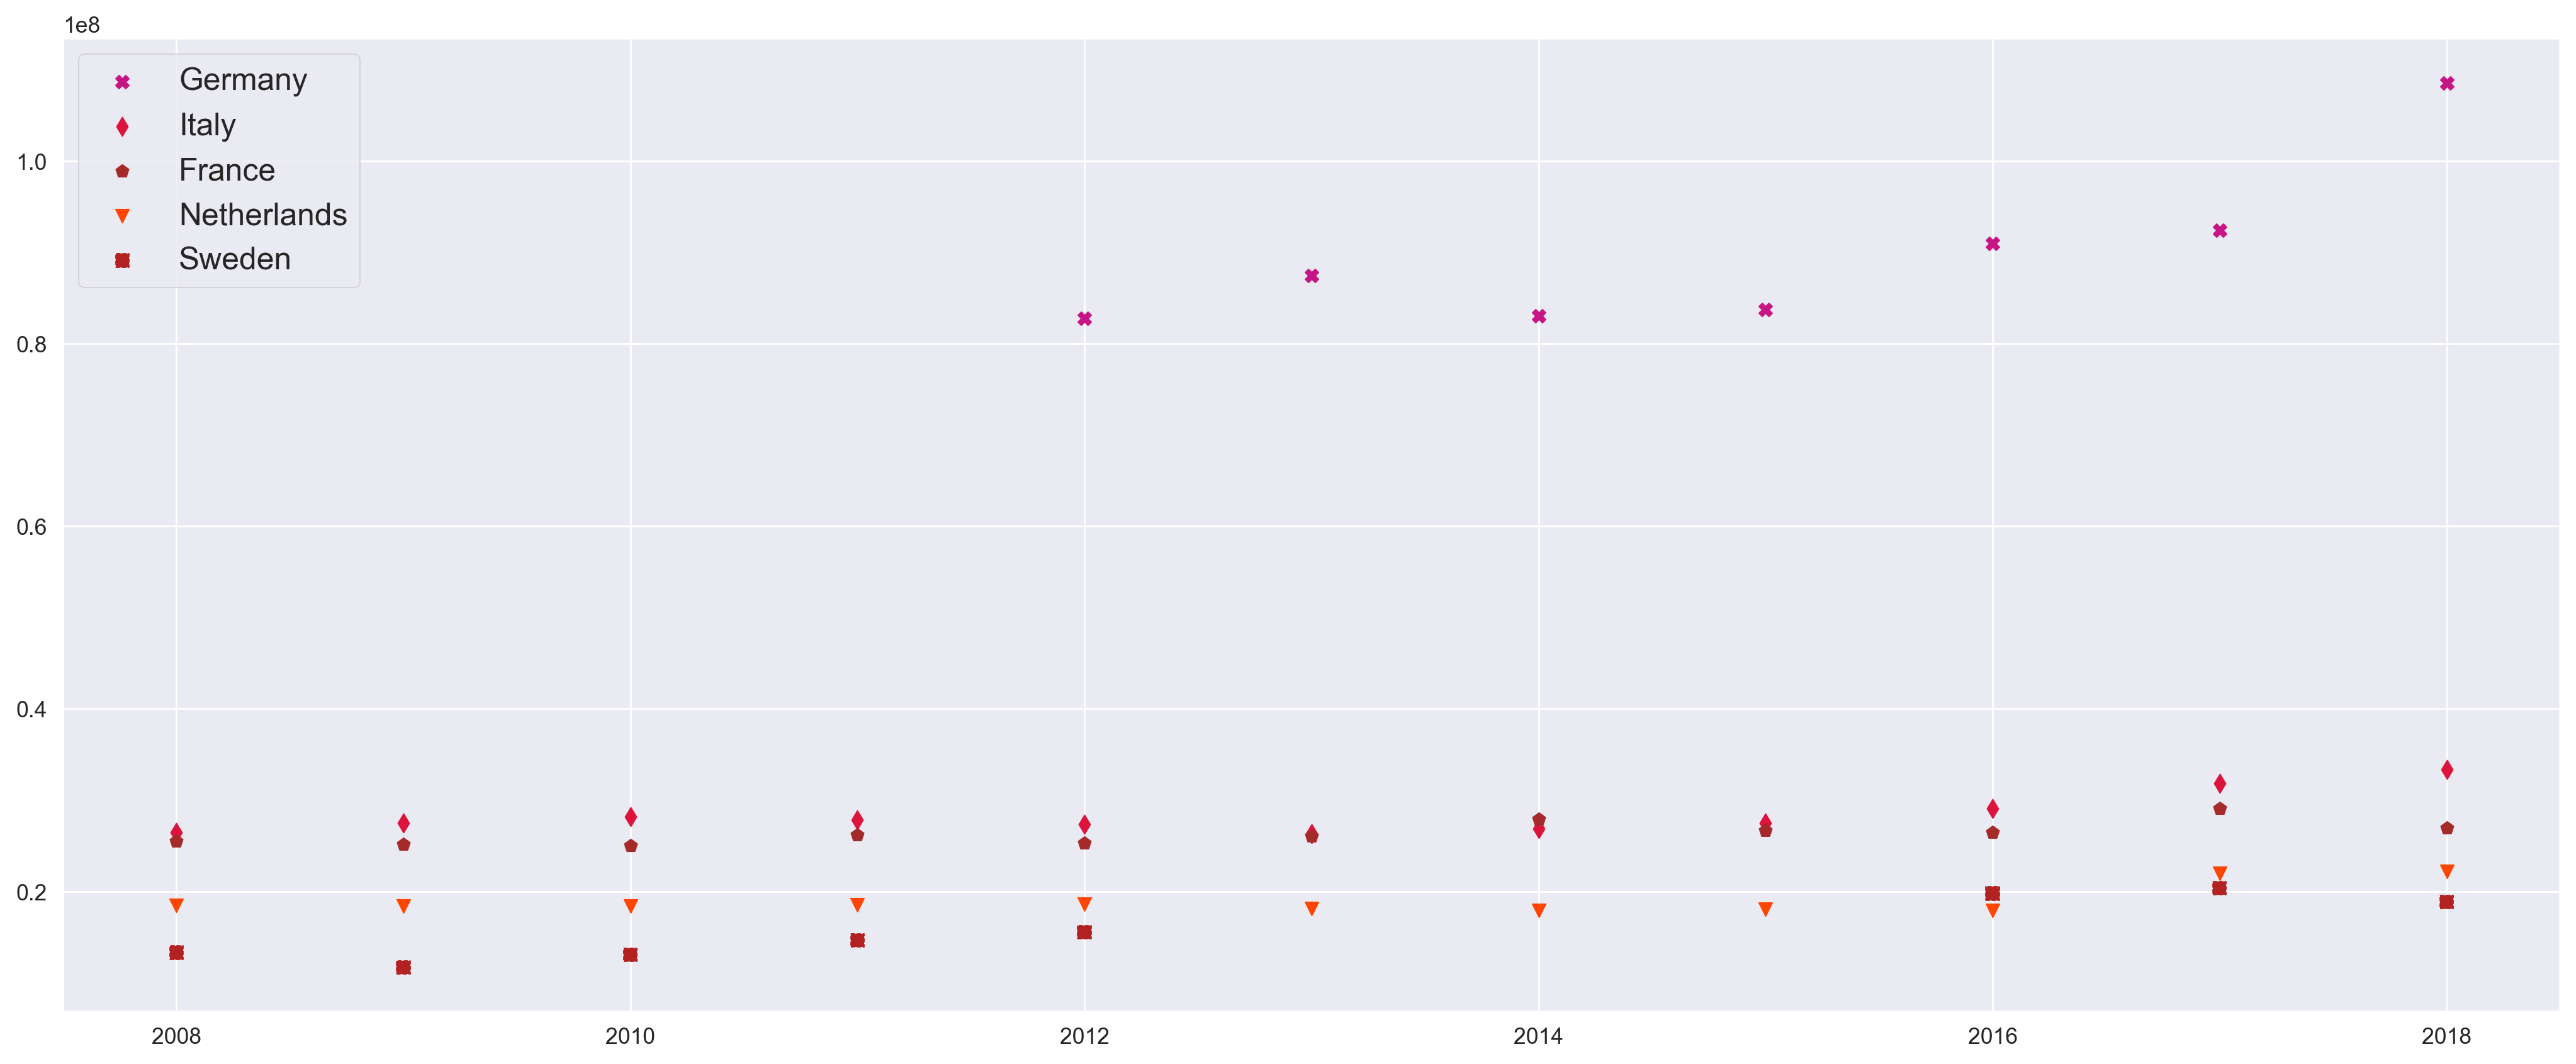

In [441]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8), dpi = 256)

germany_out = schen_eu_all_outbounds.loc['Germany'].reset_index()
italy_out = schen_eu_all_outbounds.loc['Italy'].reset_index()
france_out = schen_eu_all_outbounds.loc['France'].reset_index()
netherlands_out = schen_eu_all_outbounds.loc['Netherlands'].reset_index()
sweden_out = schen_eu_all_outbounds.loc['Sweden'].reset_index()

plt.scatter(germany_out['Year'], germany_out['Outgoing_Tourists'], color = 'mediumvioletred', marker = 'X', label = 'Germany')
ax.scatter(italy_out['Year'],italy_out['Outgoing_Tourists'] , color = 'crimson', marker = 'd', label = 'Italy')
ax.scatter(france_out['Year'],france_out['Outgoing_Tourists'],  color = 'brown', marker = 'p' ,  label = 'France')
ax.scatter(netherlands_out['Year'],netherlands_out['Outgoing_Tourists'], color = 'orangered', label = 'Netherlands', marker = 'v')
ax.scatter(sweden_out['Year'], sweden_out['Outgoing_Tourists'], color = "firebrick", ls = 'dashed', label = 'Sweden', marker = 's')

ax.legend(fontsize = 14);


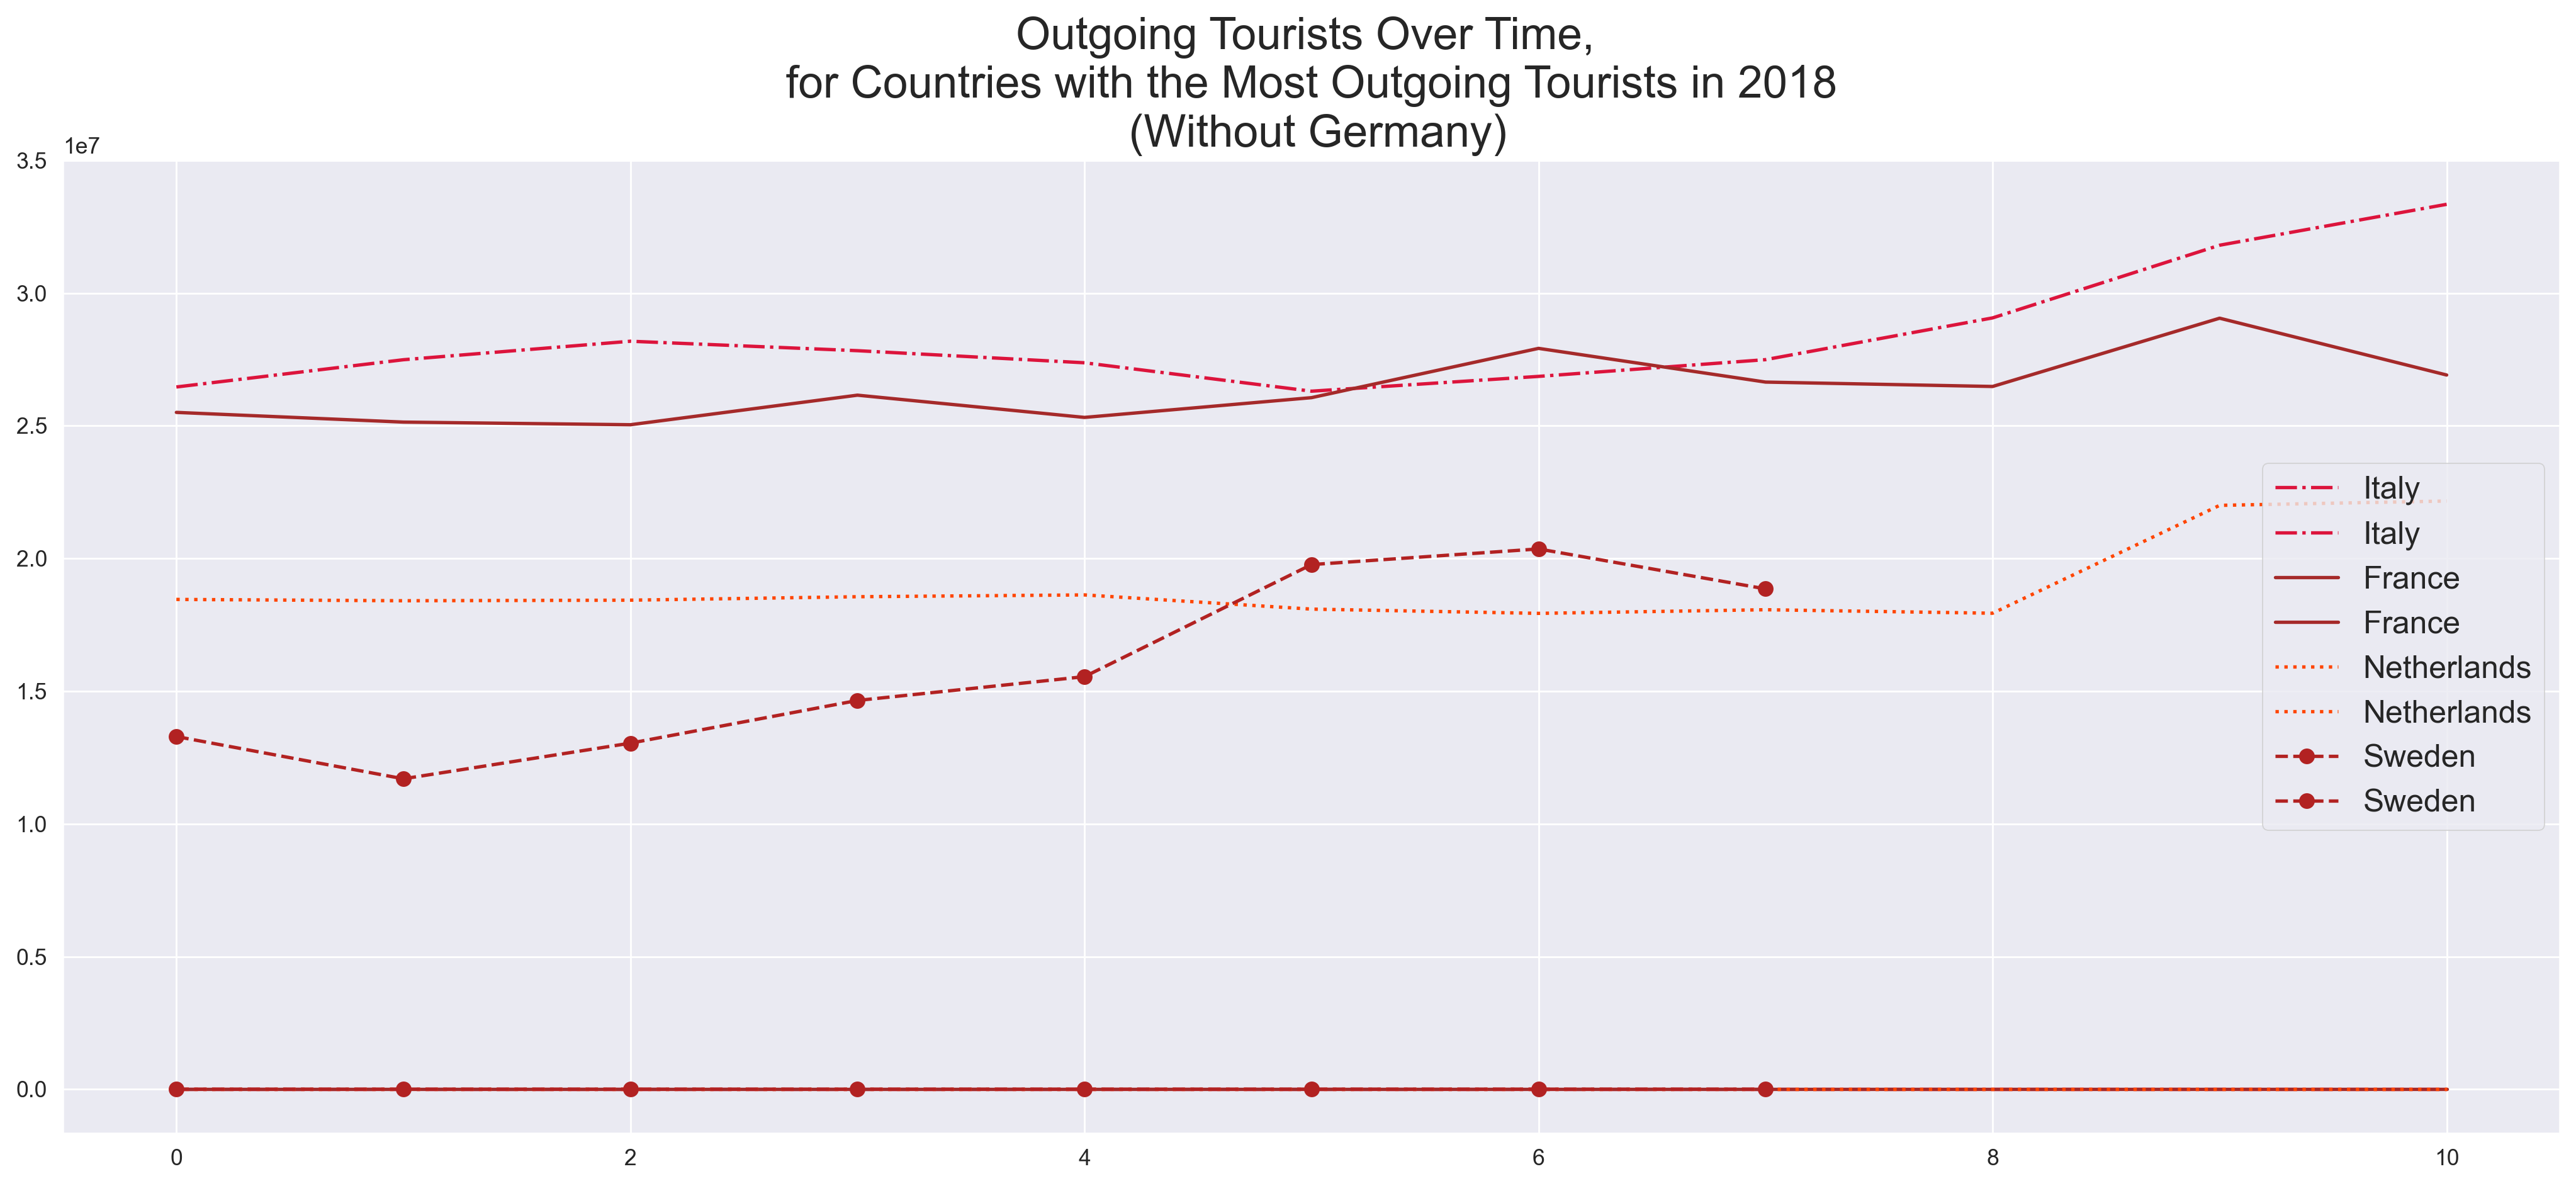

In [442]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8), dpi = 256)

ax.plot(italy_out, color = 'crimson', ls = 'dashdot', label = 'Italy')
ax.plot(france_out, color = 'brown', ls = 'solid',  label = 'France')
ax.plot(netherlands_out, color = 'orangered', ls = ":", label = 'Netherlands')
ax.plot(sweden_out, color = "firebrick", ls = 'dashed', label = 'Sweden', marker = 'o')
ax.set_title('Outgoing Tourists Over Time, \n for Countries with the Most Outgoing Tourists in 2018 \n (Without Germany)', fontsize = 20)
plt.legend(fontsize = 14);

# Graph Inbound tourists

In [443]:
max_inbounds = inbound_and_outbound_tourists.groupby('Country').max('Tourists_from_Supply_Survey').sort_values('Tourists_from_Supply_Survey', ascending = False).reset_index()
max_inbounds_top_5 = max_inbounds.head()
max_inbounds_top_5


,Country,Year,Tourists_from_Supply_Survey,Tourists_from_Demand_Survey,Outgoing_Tourists
0,Spain,2018,65771059.00,82808413.00,16424451.00
1,Italy,2018,63195203.00,61567160.00,33347082.17
2,Germany,2018,38747698.00,nan,108541530.83
3,Austria,2018,30815744.00,nan,11883182.00
4,Greece,2018,20913550.00,nan,nan


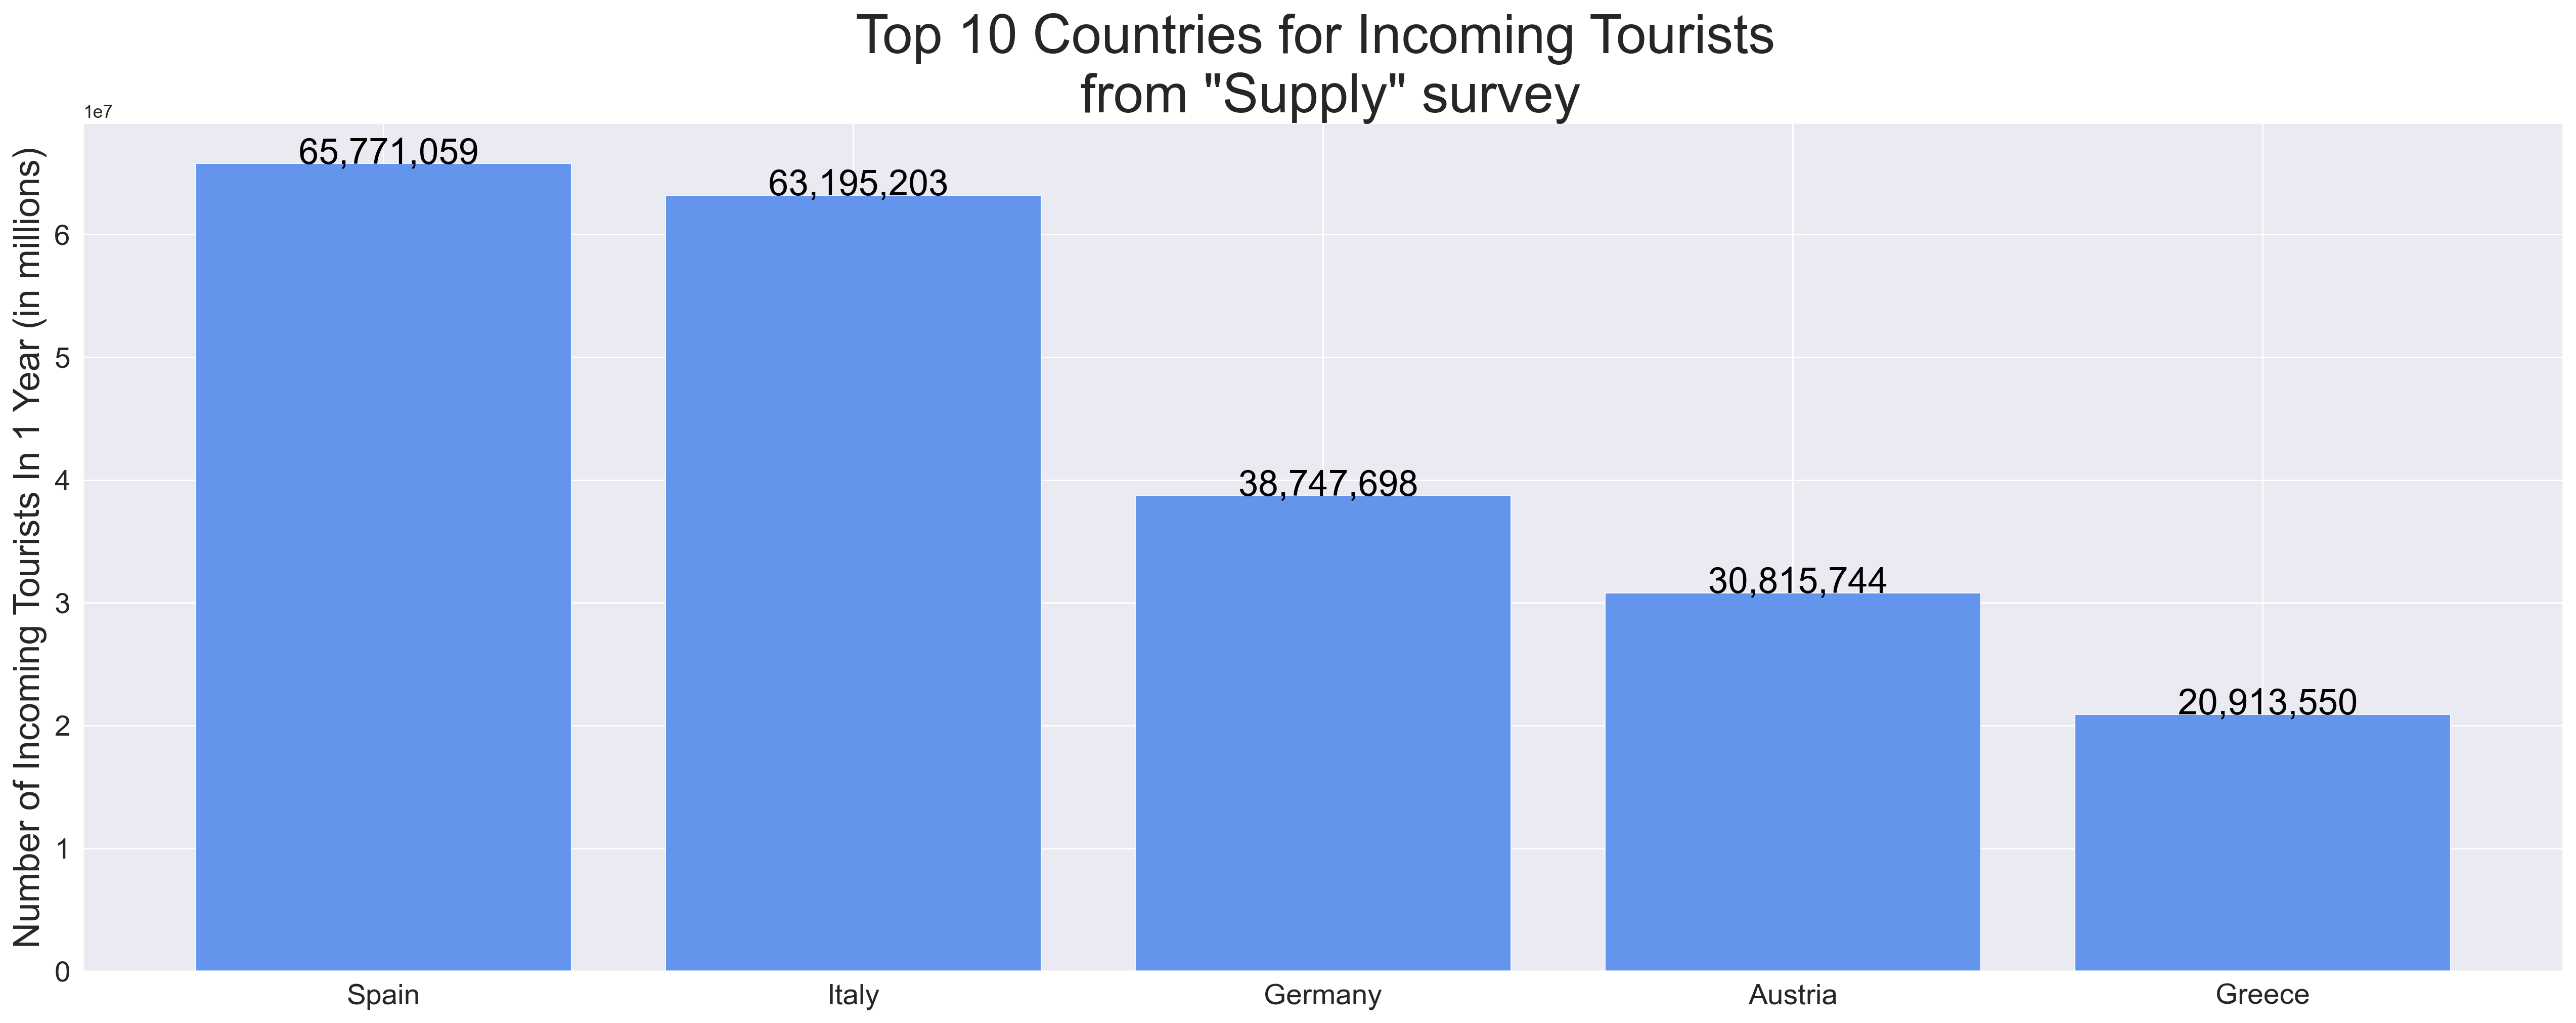

In [444]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize = (20, 8), dpi = 256)

ax.bar(max_inbounds_top_5['Country'], max_inbounds_top_5['Tourists_from_Supply_Survey'], color = 'cornflowerblue')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Number of Incoming Tourists In 1 Year (in millions)', fontsize = 20)
ax.set_title('Top 10 Countries for Incoming Tourists \n from "Supply" survey', size = 30)

for idx, data in enumerate(max_inbounds_top_5['Tourists_from_Supply_Survey']):
    plt.text(x=idx, y = data, s = f"{data: ,.0f}", ha = 'center', fontsize = 20, color = 'black')
plt.tight_layout()

#add the year this occured = 2018

### Top from the demand / supply surbvey ( this includes countries that come from both surveys)

In [445]:
max_inbounds_d = inbound_and_outbound_tourists.groupby('Country').max('Tourists_from_Demand_Survey').sort_values('Tourists_from_Demand_Survey', ascending = False).reset_index()
max_inbounds_d_top_5 = max_inbounds_d.head()
max_inbounds_d_top_5

,Country,Year,Tourists_from_Supply_Survey,Tourists_from_Demand_Survey,Outgoing_Tourists
0,France,2018,nan,89321896.00,29055410.56
1,Spain,2018,65771059.00,82808413.00,16424451.00
2,Italy,2018,63195203.00,61567160.00,33347082.17
3,Portugal,2018,16185932.00,22816800.00,2485733.00
4,Poland,2018,7082231.00,19623000.00,12746828.00


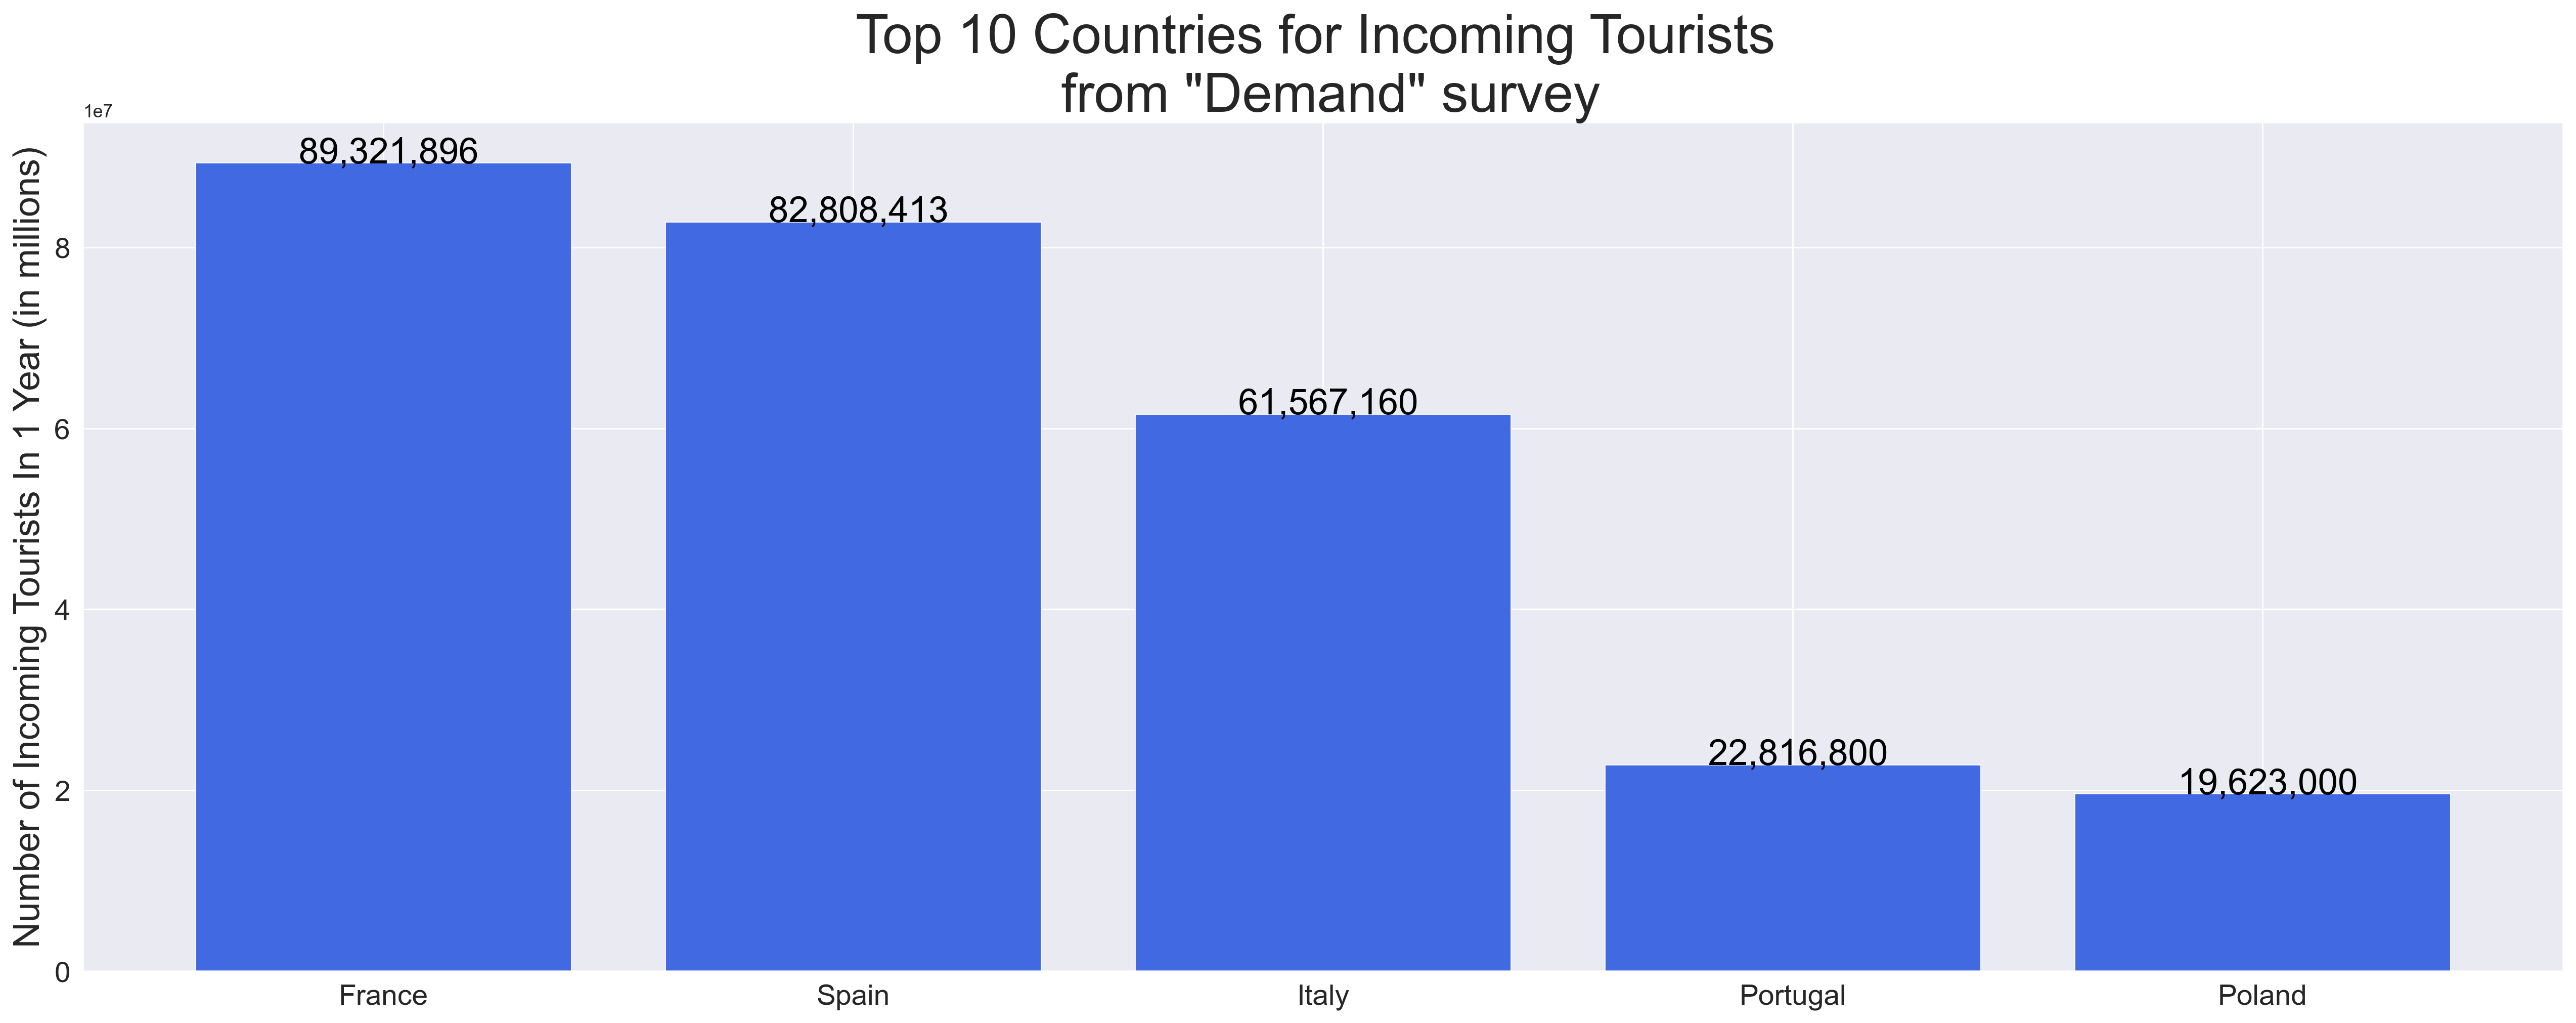

In [446]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize = (20, 8), dpi = 256)

ax.bar(max_inbounds_d_top_5['Country'], max_inbounds_d_top_5['Tourists_from_Demand_Survey'], color = 'royalblue')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Number of Incoming Tourists In 1 Year (in millions)', fontsize = 20)
ax.set_title('Top 10 Countries for Incoming Tourists \n from "Demand" survey', size = 30)

for idx, data in enumerate(max_inbounds_d_top_5['Tourists_from_Demand_Survey']):
    plt.text(x=idx, y = data, s = f"{data: ,.0f}", ha = 'center', fontsize = 20, color = 'black')
plt.tight_layout()

#add the year this occured = 2018

## From only the demand survey

In [447]:
#Fix This

fig, ax = plt.subplots(1, 1, figsize = (20, 8), dpi = 256)

ax.bar(only_years_demand_df['Country'], only_years_demand_df['Value'], color = 'blue')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Number of Incoming Tourists In 1 Year (in millions)', fontsize = 20)
ax.set_title('Incoming Tourists from countries \n only in the "Demand" survey', size = 30)

for idx, data in enumerate(only_years_demand_df['Value']):
    plt.text(x=idx, y = data, s = f"{data: ,.0f}", ha = 'center', fontsize = 20, color = 'black')


#add the year this occured = 2018

### To Do Next
- find out which countries have greatest change over time 

- Make line graph for the top 5 countries incoming and outgoing over time
    - make the Country, Outgoing_Tourists = column names, each columns into years from the schen_eu_all_outbound_tourists, with Outgoing_Tourists = value / year

- find countries that have biggest, smallest percent change from 2008 - 2018
- Find a way to measure the top spread of countries 
- graph the percent change of the countries that have 

# Percent Changes

In [488]:
#Percent Change for OUTBOUND countries

def find_percent_change():
    percent_dictionary = dict()
    for country in schen_eu_all_outbound_tourists_df['Country'].unique():
        percent_dictionary[country] = schen_eu_all_outbounds.loc[country].reset_index()['Outgoing_Tourists'].pct_change().cumsum()

    return percent_dictionary
        
dictionary = find_percent_change()
for k, v in dictionary.items():
    print (f'{k}, {v}')

Austria, 0     nan
1    0.05
2    0.02
3    0.02
4    0.13
5    0.11
6    0.14
7    0.10
8    0.19
9    0.18
10   0.22
Name: Outgoing_Tourists, dtype: float64
Belgium, 0     nan
1    0.06
2    0.15
3    0.10
4    0.07
5    0.20
6    0.25
7    0.19
8    0.46
9    0.38
10   0.45
Name: Outgoing_Tourists, dtype: float64
Czech Republic, 0      nan
1    -0.08
2    -0.10
3    -0.19
4    -0.19
5    -0.23
6    -0.26
7    -0.22
8    -0.19
9    -0.07
10    0.02
Name: Outgoing_Tourists, dtype: float64
Denmark, 0     nan
1    0.11
2    0.21
3    0.22
4    0.21
5    0.27
6    0.30
7    0.35
8    0.25
9    0.26
10   0.19
Name: Outgoing_Tourists, dtype: float64
Finland, 0      nan
1    -0.00
2     0.14
3     0.23
4     0.86
5     0.81
6     0.83
7     0.84
8     0.87
9     0.89
10    0.91
Name: Outgoing_Tourists, dtype: float64
France, 0      nan
1    -0.01
2    -0.02
3     0.03
4    -0.01
5     0.02
6     0.09
7     0.05
8     0.04
9     0.14
10    0.07
Name: Outgoing_Tourists, dtype: float64
Germany

In [449]:
pd.DataFrame(dictionary)
pd.DataFrame(dictionary)

#get the max per column

# +  Iceland (doubled!), malta, Finland, Luxembourg, Poland

# - Latvia, Romania, Czech Republic (although it boosted), Slovak Republic, 

,Austria,Belgium,Czech Republic,Denmark,Finland,France,Germany,Hungary,Iceland,Ireland,...,Croatia,Estonia,Latvia,Lithuania,Malta,Romania,Slovenia,Slovak Republic,Luxembourg,Switzerland
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.05,0.06,-0.08,0.11,-0.00,-0.01,0.06,-0.11,0.20,-0.06,...,0.06,-0.04,-0.14,-0.27,0.01,-0.10,0.05,-0.12,0.13,-0.06
2,0.02,0.15,-0.10,0.21,0.14,-0.02,0.01,-0.15,0.34,-0.05,...,-0.19,-0.04,-0.09,-0.17,0.13,-0.21,0.16,-0.27,0.03,-0.10
3,0.02,0.10,-0.19,0.22,0.23,0.03,0.02,-0.14,0.39,-0.05,...,0.35,0.04,-0.02,-0.09,0.17,-0.12,0.11,-0.10,0.12,-0.06
4,0.13,0.07,-0.19,0.21,0.86,-0.01,0.10,-0.22,0.41,-0.03,...,0.28,0.04,-0.23,0.03,0.25,-0.23,0.02,-0.30,0.08,0.18
5,0.11,0.20,-0.23,0.27,0.81,0.02,0.12,-0.21,0.49,0.04,...,0.37,0.02,-0.34,0.06,0.35,-0.15,0.07,-0.44,0.11,0.23
6,0.14,0.25,-0.26,0.30,0.83,0.09,0.29,-0.07,0.62,0.11,...,0.31,0.06,-0.25,0.08,0.42,-0.07,0.09,-0.33,0.23,0.22
7,0.10,0.19,-0.22,0.35,0.84,0.05,nan,0.09,0.81,0.18,...,0.25,0.20,-0.34,0.12,0.51,-0.08,0.17,-0.16,0.16,0.33
8,0.19,0.46,-0.19,0.25,0.87,0.04,nan,0.19,0.96,0.22,...,-0.13,0.19,-0.33,0.17,0.68,-0.19,0.17,-0.08,0.10,0.33
9,0.18,0.38,-0.07,0.26,0.89,0.14,nan,0.26,1.00,nan,...,0.06,0.22,-0.32,0.21,0.83,-0.13,0.22,nan,0.62,0.44


In [495]:
# Make an inbound dataframe with reset indices andcountry as a column  
schen_eu_supply_inbounds_df = schen_eu_supply_inbounds.reset_index()
schen_eu_supply_inbounds_df

,Country,Year,Value
0,Austria,2008,21935409
1,Austria,2009,21355440
2,Austria,2010,22004266
3,Austria,2011,23011956
4,Austria,2012,24150776
...,...,...,...
207,Switzerland,2014,9158260
208,Switzerland,2015,9304633
209,Switzerland,2016,10401929
210,Switzerland,2017,11133204


In [500]:
## Fix this

#Percent change for INCOMING tourists from the supply survey

def find_percent_change_in_supply():
    percent_dictionary_in = dict()
    
    for country in schen_eu_supply_inbounds_df['Country'].unique(): 
        percent_dictionary_in[country] = schen_eu_supply_inbounds.loc[country].reset_index()['Value'].pct_change().cumsum()

    return percent_dictionary_in
        
dictionary_supply = find_percent_change_in_supply()
for k, v in dictionary_supply.items():
    print (f'{k}, {v}')


Austria, 0      nan
1    -0.03
2     0.00
3     0.05
4     0.10
5     0.13
6     0.15
7     0.20
8     0.25
9     0.30
10    0.35
Name: Value, dtype: float64
Belgium, 0      nan
1    -0.06
2    -0.00
3     0.05
4     0.06
5     0.07
6     0.10
7     0.11
8    -0.03
9     0.11
10    0.17
Name: Value, dtype: float64
Croatia, 0     nan
1    0.00
2    0.05
3    0.14
4    0.19
5    0.24
6    0.30
7    0.39
8    0.48
9    0.61
10   0.68
Name: Value, dtype: float64
Czech Republic, 0      nan
1    -0.09
2    -0.04
3     0.02
4     0.16
5     0.18
6     0.21
7     0.29
8     0.36
9     0.45
10    0.49
Name: Value, dtype: float64
Estonia, 0    nan
1   0.04
2   0.06
3   0.03
4   0.10
5   0.14
6   0.14
Name: Value, dtype: float64
Finland, 0      nan
1    -0.11
2    -0.07
3     0.07
4     0.12
5     0.13
6     0.11
7     0.07
8     0.13
9     0.27
10    0.29
Name: Value, dtype: float64
Germany, 0      nan
1    -0.03
2     0.08
3     0.14
4     0.21
5     0.24
6     0.29
7     0.35
8     0.37
9     

In [499]:
schen_eu_only_demand_inbounds_df = schen_eu_only_demand_inbounds.reset_index()
schen_eu_only_demand_inbounds_df

,Country,Year,Value
0,Denmark,2008,8514309
1,Denmark,2009,8179643
2,Denmark,2010,8247139
3,Denmark,2011,8504322
4,Denmark,2012,8525657
5,Denmark,2013,8454546
6,Denmark,2014,10266729
7,Denmark,2015,10423502
8,Denmark,2016,10781249
9,Denmark,2017,12425764


In [505]:
def find_percent_change_in_demand():
    percent_dictionary_in_demands = dict()
    
    for country in schen_eu_only_demand_inbounds_df['Country'].unique(): 
        percent_dictionary_in_demands[country] = schen_eu_only_demand_inbounds.loc[country].reset_index()['Value'].pct_change().cumsum()

    return percent_dictionary_in_demands
        
dictionary_supply = find_percent_change_in_demand()
for k, v in dictionary_supply.items():
    print (f'{k}, {v}')

Denmark, 0      nan
1    -0.04
2    -0.03
3     0.00
4     0.00
5    -0.01
6     0.21
7     0.22
8     0.26
9     0.41
10    0.44
Name: Value, dtype: float64
France, 0      nan
1    -0.03
2    -0.03
3     0.02
4     0.04
5     0.06
6     0.06
7     0.07
8     0.05
9     0.09
10    0.12
Name: Value, dtype: float64
Iceland, 0     nan
1   -0.02
2    0.15
3    0.34
4    0.54
5    0.77
6    1.07
7    1.46
8    1.70
9    1.75
Name: Value, dtype: float64
Ireland, 0      nan
1    -0.11
2    -0.23
3    -0.17
4    -0.17
5    -0.11
6    -0.05
7     0.09
8     0.18
9     0.21
10    0.28
Name: Value, dtype: float64
Malta, 0      nan
1    -0.08
2     0.05
3     0.11
4     0.13
5     0.22
6     0.29
7     0.34
8     0.45
9     0.60
10    0.75
Name: Value, dtype: float64
Sweden, 0     nan
1    0.07
2   -0.03
3   -0.06
Name: Value, dtype: float64


# Read in the GDP file and merge

In [450]:
gdp = pd.read_csv('data/GDP_Current.csv')
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,2549720670.00,2534636872.00,2701675978.00,2765363128.00,2919553073.00,2965921788.00,3056424581.00,nan,nan,nan
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.10,548888895.60,546666677.80,751111191.10,800000044.40,1006666638.00,...,17804292964.00,20001598506.00,20561069558.00,20484885120.00,19907111419.00,19362642267.00,20191760000.00,19484384937.00,19101353833.00,nan
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,112000000000.00,128000000000.00,137000000000.00,146000000000.00,116000000000.00,101000000000.00,122000000000.00,101000000000.00,94635415870.00,nan
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,12890765324.00,12319830252.00,12776217195.00,13228144008.00,11386846319.00,11861200797.00,13019693451.00,15147020535.00,15278077447.00,nan
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,3629203786.00,3188808943.00,3193704343.00,3271808157.00,2789870188.00,2896679212.00,3000180750.00,3218316013.00,3154057987.00,nan


In [515]:
#gdp.set_index('Country Name', inplace = True)

gdp_by_years = gdp.loc[:, ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']] 
gdp_by_years.reset_index(inplace = True)
gdp_by_years[gdp_by_years['Country Name'].isin(schen_eu_countries)]

,Country Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12,Austria,430000000000.00,400000000000.00,392000000000.00,431000000000.00,409000000000.00,430000000000.00,442000000000.00,382000000000.00,395000000000.00,418000000000.00,456000000000.00
15,Belgium,515000000000.00,481000000000.00,481000000000.00,523000000000.00,496000000000.00,522000000000.00,535000000000.00,462000000000.00,476000000000.00,504000000000.00,543000000000.00
19,Bulgaria,54438966420.00,51999181062.00,50363282117.00,57363610380.00,54013812089.00,55591336862.00,56883172568.00,50630703922.00,53785050339.00,58950125036.00,66200847918.00
35,Switzerland,554000000000.00,542000000000.00,584000000000.00,700000000000.00,668000000000.00,689000000000.00,709000000000.00,680000000000.00,671000000000.00,680000000000.00,705000000000.00
52,Czech Republic,236000000000.00,206000000000.00,207000000000.00,228000000000.00,207000000000.00,209000000000.00,208000000000.00,187000000000.00,195000000000.00,216000000000.00,245000000000.00
53,Germany,3730000000000.00,3400000000000.00,3400000000000.00,3740000000000.00,3530000000000.00,3730000000000.00,3880000000000.00,3360000000000.00,3470000000000.00,3670000000000.00,3950000000000.00
56,Denmark,353000000000.00,321000000000.00,322000000000.00,344000000000.00,327000000000.00,344000000000.00,353000000000.00,303000000000.00,313000000000.00,329000000000.00,356000000000.00
68,Spain,1630000000000.00,1490000000000.00,1420000000000.00,1480000000000.00,1320000000000.00,1350000000000.00,1370000000000.00,1200000000000.00,1230000000000.00,1310000000000.00,1420000000000.00
69,Estonia,24371299985.00,19744110447.00,19693608687.00,23391529311.00,23192709239.00,25271407239.00,26773472962.00,23048864243.00,23996451498.00,26859101054.00,30747159198.00
73,Finland,285000000000.00,252000000000.00,249000000000.00,275000000000.00,258000000000.00,271000000000.00,274000000000.00,234000000000.00,241000000000.00,255000000000.00,276000000000.00


In [ ]:
all_data = pd.merge(inbound_and_outbound_tourists, gdp, on = '')


inbound_and_outbound_tourists = pd.merge(schen_eu_all_inbound_tourists, schen_eu_all_outbound_tourists, on=['Year', 'Variable', 'Country'], 
         suffixes = ['.inbound', '.outbound'], how = 'outer').sort_values(['Country', 'Year'])